In [17]:
import pandas as pd
import os

# Определение путей к файлам
completed_path = r'D:\kudo\completed (1).csv'
denied_path = r'D:\kudo\denied.csv'

try:
    # Проверка существования файлов
    for file_path in [completed_path, denied_path]:
        if not os.path.exists(file_path):
            print(f"Файл не найден: {file_path}")
            # Показать содержимое директории для помощи в устранении проблемы
            dir_path = os.path.dirname(file_path)
            if os.path.exists(dir_path):
                print(f"Файлы в директории {dir_path}:")
                for f in os.listdir(dir_path):
                    print(f"  - {f}")
            raise FileNotFoundError(f"Файл не найден: {file_path}")
    
    # Загрузка датасетов
    df_completed = pd.read_csv(completed_path)
    df_denied = pd.read_csv(denied_path)
    
    print(f"Загружены датасеты:")
    print(f"Completed: {df_completed.shape[0]} строк, {df_completed.shape[1]} столбцов")
    print(f"Denied: {df_denied.shape[0]} строк, {df_denied.shape[1]} столбцов")
    
    # Добавление отсутствующего столбца "Область" в датасет denied
    if 'Область' not in df_denied.columns:
        df_denied.insert(1, 'Область', None)  # Вставка на позицию 1 (после "Клиент")
        print("Добавлен столбец 'Область' в датасет denied.")
    
    # Добавление столбца "Тип записи"
    df_completed['Тип записи'] = 1  # 1 для записей из completed
    df_denied['Тип записи'] = 0     # 0 для записей из denied
    print("Добавлен столбец 'Тип записи': 1 для completed, 0 для denied.")
    
    # Объединение датасетов
    df_merged = pd.concat([df_completed, df_denied], ignore_index=True)
    
    print(f"Объединенный датасет: {df_merged.shape[0]} строк, {df_merged.shape[1]} столбцов")
    
    # Сохранение результата
    output_path = r'D:\kudo\merged_dataset.csv'
    df_merged.to_csv(output_path, index=False)
    print(f"Объединенный датасет сохранен в: {output_path}")
    
    # Отображение первых строк результата
    print("\nПервые строки объединенного датасета:")
    print(df_merged.head())
    
except Exception as e:
    print(f"Произошла ошибка: {e}")
    print("Проверьте правильность путей к файлам и повторите попытку.")


Загружены датасеты:
Completed: 1760218 строк, 11 столбцов
Denied: 674059 строк, 10 столбцов
Добавлен столбец 'Область' в датасет denied.
Добавлен столбец 'Тип записи': 1 для completed, 0 для denied.
Объединенный датасет: 2434277 строк, 12 столбцов
Объединенный датасет сохранен в: D:\kudo\merged_dataset.csv

Первые строки объединенного датасета:
   Unnamed: 0  Клиент                Область    SKU  Дата счёта  \
0           0  146936  Нижегородская область  15680  2021-05-24   
1           1  146936  Нижегородская область  15603  2021-05-24   
2           2  146936  Нижегородская область     64  2021-05-24   
3           3  146936  Нижегородская область  23528  2021-05-24   
4           4  146936  Нижегородская область     89  2021-05-24   

   Количество (шт.)  Цена (р.)  Сумма_заказа     Группа  \
0                61     105.30       6423.30  Автохимия   
1                 1     173.01        173.01  Автохимия   
2                11     185.12       2036.32  Автохимия   
3             

In [18]:
df_merged

Unnamed: 0  Клиент                Область    SKU  Дата счёта  \
0                 0  146936  Нижегородская область  15680  2021-05-24   
1                 1  146936  Нижегородская область  15603  2021-05-24   
2                 2  146936  Нижегородская область     64  2021-05-24   
3                 3  146936  Нижегородская область  23528  2021-05-24   
4                 4  146936  Нижегородская область     89  2021-05-24   
...             ...     ...                    ...    ...         ...   
2434272      674054  152444                   None  14026  2024-06-28   
2434273      674055  152444                   None  14044  2024-06-28   
2434274      674056  152444                   None  14046  2024-06-28   
2434275      674057  142877                   None  31996  2024-06-28   
2434276      674058  147757                   None  27006  2024-06-28   

         Количество (шт.)  Цена (р.)  Сумма_заказа                  Группа  \
0                      61     105.30       6423.30               Автохимия   
1                       1     173.01        173.01               Автохимия   
2                      11     185.12       2036.32               Автохимия   
3                       2     144.18        288.36               Автохимия   
4                       1     160.16        160.16               Автохимия   
...                   ...        ...           ...                     ...   
2434272               144      89.60      12902.40  ЛКМ универсальные KUDO   
2434273               276     100.10      27627.60  ЛКМ универсальные KUDO   
2434274               120      99.90      11988.00  ЛКМ универсальные KUDO   
2434275               384     317.40     121881.60               Пены KUDO   
2434276                24      95.80       2299.20  ЛКМ универсальные KUDO   

                                                       Тип  \
0                             Прочие профильные очистители   
1                                     Полироли Аэрозольные   
2                             Прочие профильные очистители   
3                                       Смазки Аэрозольные   
4                                       Смазки Аэрозольные   
...                                                    ...   
2434272                                Эмали универсальные   
2434273                      Эмали универсальная металлики   
2434274                      Эмали универсальная металлики   
2434275  KUDO Бытовая HOME - летняя (+5 +35) монтажная ...   
2434276                            Эмали универсальные RAL   

                       Категория  Тип записи  
0                         KERRY®           1  
1                         KERRY®           1  
2                         AXIOM®           1  
3                         AXIOM®           1  
4                         AXIOM®           1  
...                          ...         ...  
2434272  KUDO® универсальные ЛКМ           0  
2434273  KUDO® универсальные ЛКМ           0  
2434274  KUDO® универсальные ЛКМ           0  
2434275                Пены KUDO           0  
2434276  KUDO® универсальные ЛКМ           0  

[2434277 rows x 12 columns]

In [19]:
import pandas as pd
import numpy as np

def add_okrug(df):
    """
    Функция добавляет столбец с федеральным округом на основе столбца 'Область'
    
    Parameters:
    df (pandas.DataFrame): DataFrame с данными, содержащий столбец 'Область'
    
    Returns:
    pandas.DataFrame: DataFrame с новым столбцом 'Федеральный округ'
    """
    # Убедимся, что в DataFrame есть столбец 'Область'
    oblast_column = 'Область'
    if oblast_column not in df.columns:
        # Попробуем найти похожие столбцы
        for col in df.columns:
            if 'област' in col.lower() or 'region' in col.lower() or 'регион' in col.lower():
                oblast_column = col
                print(f"Используем столбец '{oblast_column}' вместо 'Область'")
                break
        else:
            print("Не найден столбец 'Область' или подобный ему. Доступные столбцы:")
            print(df.columns.tolist())
            return df
    
    # Создаем словарь для соответствия регионов федеральным округам
    okrug_dict = {
        # Центральный федеральный округ
        'Москва': 'Центральный федеральный округ',
        'Смоленская область': 'Центральный федеральный округ',
        'Брянская область': 'Центральный федеральный округ',
        'Орловская область': 'Центральный федеральный округ',
        'Калужская область': 'Центральный федеральный округ',
        'Воронежская область': 'Центральный федеральный округ',
        'Белгородская область': 'Центральный федеральный округ',
        'Владимирская область': 'Центральный федеральный округ',
        'Ярославская область': 'Центральный федеральный округ',
        'Тульская область': 'Центральный федеральный округ',
        'Рязанская область': 'Центральный федеральный округ',
        'Курская область': 'Центральный федеральный округ',
        'Тамбовская область': 'Центральный федеральный округ',
        'Липецкая область': 'Центральный федеральный округ',
        'Тверская область': 'Центральный федеральный округ',
        'Ивановская область': 'Центральный федеральный округ',
        'Московская область': 'Центральный федеральный округ',
        'Костромская область': 'Центральный федеральный округ',
        
        # Северо-Западный федеральный округ
        'Республика Коми': 'Северо-Западный федеральный округ',
        'Псковская область': 'Северо-Западный федеральный округ',
        'Калининградская область': 'Северо-Западный федеральный округ',
        'Архангельская область': 'Северо-Западный федеральный округ',
        'Санкт-Петербург': 'Северо-Западный федеральный округ',
        'Вологодская область': 'Северо-Западный федеральный округ',
        'Новгородская область': 'Северо-Западный федеральный округ',
        'Республика Карелия': 'Северо-Западный федеральный округ',
        'Мурманская область': 'Северо-Западный федеральный округ',
        
        # Южный федеральный округ
        'Краснодарский край': 'Южный федеральный округ',
        'Волгоградская область': 'Южный федеральный округ',
        'Ростовская область': 'Южный федеральный округ',
        'Астраханская область': 'Южный федеральный округ',
        'Республика Крым': 'Южный федеральный округ',
        
        # Северо-Кавказский федеральный округ
        'Ставропольский край': 'Северо-Кавказский федеральный округ',
        'Республика Северная Осетия — Алания': 'Северо-Кавказский федеральный округ',
        'Республика Ингушетия': 'Северо-Кавказский федеральный округ',
        'Республика Дагестан': 'Северо-Кавказский федеральный округ',
        'Чеченская Республика': 'Северо-Кавказский федеральный округ',
        
        # Приволжский федеральный округ
        'Нижегородская область': 'Приволжский федеральный округ',
        'Республика Татарстан': 'Приволжский федеральный округ',
        'Самарская область': 'Приволжский федеральный округ',
        'Саратовская область': 'Приволжский федеральный округ',
        'Удмуртская Республика': 'Приволжский федеральный округ',
        'Чувашская Республика': 'Приволжский федеральный округ',
        'Кировская область': 'Приволжский федеральный округ',
        'Пензенская область': 'Приволжский федеральный округ',
        'Республика Марий Эл': 'Приволжский федеральный округ',
        'Оренбургская область': 'Приволжский федеральный округ',
        'Республика Башкортостан': 'Приволжский федеральный округ',
        'Ульяновская область': 'Приволжский федеральный округ',
        'Республика Мордовия': 'Приволжский федеральный округ',
        
        # Уральский федеральный округ
        'Ханты-Мансийский автономный округ — Югра': 'Уральский федеральный округ',
        'Курганская область': 'Уральский федеральный округ',
        'Челябинская область': 'Уральский федеральный округ',
        'Свердловская область': 'Уральский федеральный округ',
        'Тюменская область': 'Уральский федеральный округ',
        
        # Сибирский федеральный округ
        'Красноярский край': 'Сибирский федеральный округ',
        'Кемеровская область': 'Сибирский федеральный округ',
        'Иркутская область': 'Сибирский федеральный округ',
        'Омская область': 'Сибирский федеральный округ',
        'Алтайский край': 'Сибирский федеральный округ',
        'Томская область': 'Сибирский федеральный округ',
        'Республика Хакасия': 'Сибирский федеральный округ',
        'Новосибирская область': 'Сибирский федеральный округ',
        
        # Дальневосточный федеральный округ
        'Сахалинская область': 'Дальневосточный федеральный округ',
        'Камчатский край': 'Дальневосточный федеральный округ',
        'Приморский край': 'Дальневосточный федеральный округ',
        'Республика Саха (Якутия)': 'Дальневосточный федеральный округ',
        'Хабаровский край': 'Дальневосточный федеральный округ',
        'Забайкальский край': 'Дальневосточный федеральный округ',
        'Амурская область': 'Дальневосточный федеральный округ',
        'Республика Бурятия': 'Дальневосточный федеральный округ',
        'Чукотский автономный округ': 'Дальневосточный федеральный округ',
        'Магаданская область': 'Дальневосточный федеральный округ',
    }
    
    # Создаем новый столбец с NaN значениями по умолчанию
    df['Округ'] = pd.NA
    
    # Заполняем значения на основе словаря
    for region, okrug in okrug_dict.items():
        df.loc[df[oblast_column] == region, 'Округ'] = okrug
    
    return df

# Пример использования:
# Чтение файла
df = df_merged
# 
# # Добавление столбца с федеральным округом
df = add_okrug(df)
#   
# # Сохранение результата
df.to_csv('completed_with_okrug.csv', index=False, encoding='utf-8') 

In [20]:
import pandas as pd

# Пути к файлам
dataset_paths = [
    r'C:\Users\Huawei\Desktop\credit_data\15_30.csv',
    r'C:\Users\Huawei\Desktop\credit_data\15_31.csv',
    r'C:\Users\Huawei\Desktop\credit_data\15_32.csv',
    r'C:\Users\Huawei\Desktop\credit_data\15_33.csv',
    r'C:\Users\Huawei\Desktop\credit_data\19_39.csv',
    r'C:\Users\Huawei\Desktop\credit_data\19_40.csv'
]

# Чтение и объединение датасетов
dataframes = []
for path in dataset_paths:
    try:
        # Извлекаем имя файла без расширения для использования в качестве суффикса
        filename = path.split('\\')[-1].split('.')[0]  # Добавлен индекс [0]
        
        # Чтение файла, использование index_col=0 для обработки безымянного индекса
        df = pd.read_csv(path, index_col=0)
        
        # Удаление любых оставшихся столбцов, начинающихся с 'Unnamed:'
        unnamed_cols = [col for col in df.columns if 'Unnamed:' in col]
        if unnamed_cols:
            df = df.drop(columns=unnamed_cols)
        
        # Добавляем суффикс ко всем столбцам, кроме 'dt' и 'Округ'
        renamed_columns = {col: f"{col}_{filename}" for col in df.columns if col not in ['dt', 'Округ']}
        df = df.rename(columns=renamed_columns)
        
        dataframes.append(df)
        print(f"Файл {path} успешно загружен")
    except Exception as e:
        print(f"Ошибка при чтении файла {path}: {e}")

# Объединение всех датафреймов
if dataframes:
    # Используем merge вместо concat для правильного объединения по dt и Округ
    merged_df = dataframes[0]  # Исправлено с dataframes на dataframes[0]
    for i in range(1, len(dataframes)):
        merged_df = pd.merge(merged_df, dataframes[i], on=['dt', 'Округ'], how='outer')
    
    # Сортировка по дате и округу
    merged_df = merged_df.sort_values(by=['dt', 'Округ']).reset_index(drop=True)
    
    # Сохранение объединенного датасета на диск
    output_path = r'C:\Users\Huawei\Desktop\credit_data\merged_by_okrug.csv'
    merged_df.to_csv(output_path, index=False)
    print(f"\nОбъединенный датасет сохранен в файл: {output_path}")
    
    # Вывод информации об объединенном датасете
    print(f"\nРазмер объединенного датасета: {merged_df.shape}")
    print("\nКолонки в объединенном датасете:")
    print(merged_df.columns.tolist())
    print("\nПервые 5 строк объединенного датасета:")
    print(merged_df.head())
else:
    print("Не удалось загрузить ни один файл")
    merged_df = None


Файл C:\Users\Huawei\Desktop\credit_data\15_30.csv успешно загружен
Файл C:\Users\Huawei\Desktop\credit_data\15_31.csv успешно загружен
Файл C:\Users\Huawei\Desktop\credit_data\15_32.csv успешно загружен
Файл C:\Users\Huawei\Desktop\credit_data\15_33.csv успешно загружен
Файл C:\Users\Huawei\Desktop\credit_data\19_39.csv успешно загружен
Файл C:\Users\Huawei\Desktop\credit_data\19_40.csv успешно загружен

Объединенный датасет сохранен в файл: C:\Users\Huawei\Desktop\credit_data\merged_by_okrug.csv

Размер объединенного датасета: (480, 14)

Колонки в объединенном датасете:
["До 1 года, включая ''до востребования''_15_30", 'dt', 'Округ', 'Свыше 1 года_15_30', "До 1 года, включая ''до востребования''_15_31", 'Свыше 1 года_15_31', "До 1 года, включая ''до востребования''_15_32", 'Свыше 1 года_15_32', "До 1 года, включая ''до востребования''_15_33", 'Свыше 1 года_15_33', "До 1 года, включая ''до востребования''_19_39", 'Свыше 1 года_19_39', "До 1 года, включая ''до востребования''_19_40", '

In [21]:
from IPython.display import display

pd.set_option('display.max_columns', None)
display(merged_df)


До 1 года, включая ''до востребования''_15_30           dt  \
0                                             6.42  Август 2020   
1                                             6.26  Август 2020   
2                                             5.35  Август 2020   
3                                             6.53  Август 2020   
4                                             6.61  Август 2020   
..                                             ...          ...   
475                                          11.38  Январь 2024   
476                                          15.68  Январь 2024   
477                                          15.64  Январь 2024   
478                                          17.70  Январь 2024   
479                                          14.64  Январь 2024   

                                   Округ  Свыше 1 года_15_30  \
0      Дальневосточный федеральный округ                7.55   
1          Приволжский федеральный округ                7.02   
2      Северо-Западный федеральный округ                7.77   
3    Северо-Кавказский федеральный округ                7.56   
4            Сибирский федеральный округ                7.46   
..                                   ...                 ...   
475  Северо-Кавказский федеральный округ               14.46   
476          Сибирский федеральный округ               15.08   
477          Уральский федеральный округ               16.42   
478        Центральный федеральный округ               13.59   
479              Южный федеральный округ               16.01   

     До 1 года, включая ''до востребования''_15_31  Свыше 1 года_15_31  \
0                                             5.43                7.63   
1                                             6.37                7.53   
2                                             7.07                9.09   
3                                             6.60                7.87   
4                                             6.11                7.46   
..                                             ...                 ...   
475                                          11.89               16.15   
476                                          15.79               15.87   
477                                          15.78               15.07   
478                                          17.46               14.68   
479                                          13.41               16.57   

     До 1 года, включая ''до востребования''_15_32  Свыше 1 года_15_32  \
0                                            14.05               10.96   
1                                            14.09               10.85   
2                                            13.39               10.47   
3                                            14.94               12.09   
4                                            14.12               11.01   
..                                             ...                 ...   
475                                          21.11               18.80   
476                                          23.34               18.22   
477                                          22.57               17.60   
478                                          22.76               17.41   
479                                          22.70               17.56   

     До 1 года, включая ''до востребования''_15_33  Свыше 1 года_15_33  \
0                                             7.15               12.72   
1                                             8.51               12.92   
2                                             6.99               12.22   
3                                             7.06               12.96   
4                                             7.14               12.61   
..                                             ...                 ...   
475                                           5.37               18.91   
476                                          12.36           

In [22]:
import pandas as pd
import re

# -------------------------------
# 1. Загрузка и подготовка df1
# -------------------------------
df1 = pd.read_csv(r'C:\Users\Huawei\Desktop\credit_data\completed_with_okrug.csv')

# Преобразуем дату в df1 и создаём столбец year_month
df1['Дата счёта'] = pd.to_datetime(df1['Дата счёта'])
df1['year_month'] = df1['Дата счёта'].dt.strftime('%Y-%m')

# Нормализуем столбец для объединения по округу
df1['Округ'] = df1['Округ'].str.strip()

# Если в df1 есть столбец для области, нормализуем его; 
# если его нет – можно создать, например, копируя значение из 'Округ'
if 'Область' in df1.columns:
    df1['Область'] = df1['Область'].str.strip().str.lower()
else:
    df1['Область'] = df1['Округ'].str.strip().str.lower()

# -------------------------------
# 2. Функция для преобразования дат
# -------------------------------
def convert_ru_date(date_str):
    if pd.isna(date_str):
        return None
    date_str = date_str.lower()
    # Ищем год с помощью регулярного выражения
    year_match = re.search(r'\d{4}', date_str)
    if not year_match:
        return None
    year = year_match.group()
    
    # Словарь соответствия русских месяцев числовому формату
    month_dict = {
        'январь': '01', 'февраль': '02', 'март': '03', 'апрель': '04',
        'май': '05', 'июнь': '06', 'июль': '07', 'август': '08',
        'сентябрь': '09', 'октябрь': '10', 'ноябрь': '11', 'декабрь': '12'
    }
    for ru_month, month_num in month_dict.items():
        if ru_month in date_str:
            return f"{year}-{month_num}"
    return None

# -------------------------------
# 3. Загрузка и подготовка дополнительных датасетов
# -------------------------------

# 3.1. Датасет для объединения по округу
df_okrug = pd.read_csv(r'C:\Users\Huawei\Desktop\credit_data\merged_by_okrug.csv')
df_okrug['year_month'] = df_okrug['dt'].apply(convert_ru_date)
df_okrug['Округ'] = df_okrug['Округ'].str.strip()

# 3.2. Датасет для объединения по области
df_oblast = pd.read_csv(r'C:\Users\Huawei\Desktop\credit_data\merged_by_oblast.csv')
df_oblast['year_month'] = df_oblast['dt'].apply(convert_ru_date)
# Переименовываем столбец 'Округ' в 'Область' для объединения
df_oblast = df_oblast.rename(columns={'Округ': 'Область'})
df_oblast['Область'] = df_oblast['Область'].str.strip().str.lower()

# -------------------------------
# 4. Последовательное объединение
# -------------------------------

# Сохраняем исходное число строк из df1 для проверки
initial_rows = df1.shape[0]

# 4.1. Объединяем df1 с данными по округу (левая таблица – df1, чтобы сохранить все строки)
merged_df = pd.merge(
    df1,
    df_okrug,
    on=['Округ', 'year_month'],
    how='left',
    suffixes=('', '_okrug')
)

# 4.2. Объединяем полученный результат с данными по области
merged_df = pd.merge(
    merged_df,
    df_oblast,
    on=['Область', 'year_month'],
    how='left',
    suffixes=('', '_oblast')
)

# Проверяем, что количество строк не изменилось
assert merged_df.shape[0] == initial_rows, "Количество строк в итоговом датасете изменилось!"

# -------------------------------
# 5. Сохранение и вывод результата
# -------------------------------
output_path = r'C:\Users\Huawei\Desktop\credit_data\merged_result_full.csv'
merged_df.to_csv(output_path, index=False)

print(f"Полностью смерженный датасет сохранён: {output_path}")
print("Первые строки итогового датасета:")
print(merged_df.head())


C:\Users\Huawei\AppData\Local\Temp\ipykernel_18676\4125665276.py:7: DtypeWarning: Columns (2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r'C:\Users\Huawei\Desktop\credit_data\completed_with_okrug.csv')


Полностью смерженный датасет сохранён: C:\Users\Huawei\Desktop\credit_data\merged_result_full.csv
Первые строки итогового датасета:
   Unnamed: 0  Клиент                Область    SKU Дата счёта  \
0           0  146936  нижегородская область  15680 2021-05-24   
1           1  146936  нижегородская область  15603 2021-05-24   
2           2  146936  нижегородская область     64 2021-05-24   
3           3  146936  нижегородская область  23528 2021-05-24   
4           4  146936  нижегородская область     89 2021-05-24   

   Количество (шт.)  Цена (р.)  Сумма_заказа     Группа  \
0                61     105.30       6423.30  Автохимия   
1                 1     173.01        173.01  Автохимия   
2                11     185.12       2036.32  Автохимия   
3                 2     144.18        288.36  Автохимия   
4                 1     160.16        160.16  Автохимия   

                            Тип Категория  Тип записи  \
0  Прочие профильные очистители    KERRY®           1   
1 

In [23]:
merged_df

Unnamed: 0  Клиент                Область    SKU Дата счёта  \
0                 0  146936  нижегородская область  15680 2021-05-24   
1                 1  146936  нижегородская область  15603 2021-05-24   
2                 2  146936  нижегородская область     64 2021-05-24   
3                 3  146936  нижегородская область  23528 2021-05-24   
4                 4  146936  нижегородская область     89 2021-05-24   
...             ...     ...                    ...    ...        ...   
2434272      674054  152444                    NaN  14026 2024-06-28   
2434273      674055  152444                    NaN  14044 2024-06-28   
2434274      674056  152444                    NaN  14046 2024-06-28   
2434275      674057  142877                    NaN  31996 2024-06-28   
2434276      674058  147757                    NaN  27006 2024-06-28   

         Количество (шт.)  Цена (р.)  Сумма_заказа                  Группа  \
0                      61     105.30       6423.30               Автохимия   
1                       1     173.01        173.01               Автохимия   
2                      11     185.12       2036.32               Автохимия   
3                       2     144.18        288.36               Автохимия   
4                       1     160.16        160.16               Автохимия   
...                   ...        ...           ...                     ...   
2434272               144      89.60      12902.40  ЛКМ универсальные KUDO   
2434273               276     100.10      27627.60  ЛКМ универсальные KUDO   
2434274               120      99.90      11988.00  ЛКМ универсальные KUDO   
2434275               384     317.40     121881.60               Пены KUDO   
2434276                24      95.80       2299.20  ЛКМ универсальные KUDO   

                                                       Тип  \
0                             Прочие профильные очистители   
1                                     Полироли Аэрозольные   
2                             Прочие профильные очистители   
3                                       Смазки Аэрозольные   
4                                       Смазки Аэрозольные   
...                                                    ...   
2434272                                Эмали универсальные   
2434273                      Эмали универсальная металлики   
2434274                      Эмали универсальная металлики   
2434275  KUDO Бытовая HOME - летняя (+5 +35) монтажная ...   
2434276                            Эмали универсальные RAL   

                       Категория  Тип записи                          Округ  \
0                         KERRY®           1  Приволжский федеральный округ   
1                         KERRY®           1  Приволжский федеральный округ   
2                         AXIOM®           1  Приволжский федеральный округ   
3                         AXIOM®           1  Приволжский федеральный округ   
4                         AXIOM®           1  Приволжский федеральный округ   
...                          ...         ...                            ...   
2434272  KUDO® универсальные ЛКМ           0                            NaN   
2434273  KUDO® универсальные ЛКМ           0                            NaN   
2434274  KUDO® универсальные ЛКМ           0                            NaN   
2434275                Пены KUDO           0                            NaN   
2434276  KUDO® универсальные ЛКМ           0                            NaN   

        year_month  До 1 года, включая ''до востребования''_15_30        dt  \
0          2021-05                                           7.12  Май 2021   
1          2021-05                                           7.12  Май 2021   
2          2021-05                                           7.12  Май 2021   
3          2021-05                                           7.12  Май 2021   
4          2021-05                                           7.12  Май 2021   
...            ...                     

In [24]:
import pandas as pd

# Создаем датафрейм с недостающими месяцами
missing_months = ['2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12']
new_rows = pd.DataFrame({'year_month': missing_months})

# Преобразуем year_month в формат datetime и добавляем в столбец 'Дата счёта'
new_rows['Дата счёта'] = pd.to_datetime(new_rows['year_month'] + '-01')

# Добавляем эти строки в конец merged_df
merged_df = pd.concat([merged_df, new_rows], ignore_index=True)


In [25]:
merged_df

Unnamed: 0    Клиент                Область      SKU Дата счёта  \
0               0.0  146936.0  нижегородская область  15680.0 2021-05-24   
1               1.0  146936.0  нижегородская область  15603.0 2021-05-24   
2               2.0  146936.0  нижегородская область     64.0 2021-05-24   
3               3.0  146936.0  нижегородская область  23528.0 2021-05-24   
4               4.0  146936.0  нижегородская область     89.0 2021-05-24   
...             ...       ...                    ...      ...        ...   
2434278         NaN       NaN                    NaN      NaN 2024-08-01   
2434279         NaN       NaN                    NaN      NaN 2024-09-01   
2434280         NaN       NaN                    NaN      NaN 2024-10-01   
2434281         NaN       NaN                    NaN      NaN 2024-11-01   
2434282         NaN       NaN                    NaN      NaN 2024-12-01   

         Количество (шт.)  Цена (р.)  Сумма_заказа     Группа  \
0                    61.0     105.30       6423.30  Автохимия   
1                     1.0     173.01        173.01  Автохимия   
2                    11.0     185.12       2036.32  Автохимия   
3                     2.0     144.18        288.36  Автохимия   
4                     1.0     160.16        160.16  Автохимия   
...                   ...        ...           ...        ...   
2434278               NaN        NaN           NaN        NaN   
2434279               NaN        NaN           NaN        NaN   
2434280               NaN        NaN           NaN        NaN   
2434281               NaN        NaN           NaN        NaN   
2434282               NaN        NaN           NaN        NaN   

                                  Тип Категория  Тип записи  \
0        Прочие профильные очистители    KERRY®         1.0   
1                Полироли Аэрозольные    KERRY®         1.0   
2        Прочие профильные очистители    AXIOM®         1.0   
3                  Смазки Аэрозольные    AXIOM®         1.0   
4                  Смазки Аэрозольные    AXIOM®         1.0   
...                               ...       ...         ...   
2434278                           NaN       NaN         NaN   
2434279                           NaN       NaN         NaN   
2434280                           NaN       NaN         NaN   
2434281                           NaN       NaN         NaN   
2434282                           NaN       NaN         NaN   

                                 Округ year_month  \
0        Приволжский федеральный округ    2021-05   
1        Приволжский федеральный округ    2021-05   
2        Приволжский федеральный округ    2021-05   
3        Приволжский федеральный округ    2021-05   
4        Приволжский федеральный округ    2021-05   
...                                ...        ...   
2434278                            NaN    2024-08   
2434279                            NaN    2024-09   
2434280                            NaN    2024-10   
2434281                            NaN    2024-11   
2434282                            NaN    2024-12   

         До 1 года, включая ''до востребования''_15_30        dt  \
0                                                 7.12  Май 2021   
1                                                 7.12  Май 2021   
2                                                 7.12  Май 2021   
3                                                 7.12  Май 2021   
4                                                 7.12  Май 2021   
...                                                ...       ...   
2434278                                            NaN       NaN   
2434279                                            NaN       NaN   
2434280                                            NaN       NaN   
2434281                                            NaN       NaN   
2434282                                            NaN       NaN   

         Свыше 1 года_15_30  До 1 года, включая ''до востребования''_15_31  \
0                      6.8

In [26]:
cols_to_remove = ["Unnamed: 0", "dt_oblast", "dt", "year_month"]
merged_df = merged_df.drop(columns=cols_to_remove)


In [27]:
final_df=merged_df


In [28]:
final_df

Клиент                Область      SKU Дата счёта  \
0        146936.0  нижегородская область  15680.0 2021-05-24   
1        146936.0  нижегородская область  15603.0 2021-05-24   
2        146936.0  нижегородская область     64.0 2021-05-24   
3        146936.0  нижегородская область  23528.0 2021-05-24   
4        146936.0  нижегородская область     89.0 2021-05-24   
...           ...                    ...      ...        ...   
2434278       NaN                    NaN      NaN 2024-08-01   
2434279       NaN                    NaN      NaN 2024-09-01   
2434280       NaN                    NaN      NaN 2024-10-01   
2434281       NaN                    NaN      NaN 2024-11-01   
2434282       NaN                    NaN      NaN 2024-12-01   

         Количество (шт.)  Цена (р.)  Сумма_заказа     Группа  \
0                    61.0     105.30       6423.30  Автохимия   
1                     1.0     173.01        173.01  Автохимия   
2                    11.0     185.12       2036.32  Автохимия   
3                     2.0     144.18        288.36  Автохимия   
4                     1.0     160.16        160.16  Автохимия   
...                   ...        ...           ...        ...   
2434278               NaN        NaN           NaN        NaN   
2434279               NaN        NaN           NaN        NaN   
2434280               NaN        NaN           NaN        NaN   
2434281               NaN        NaN           NaN        NaN   
2434282               NaN        NaN           NaN        NaN   

                                  Тип Категория  Тип записи  \
0        Прочие профильные очистители    KERRY®         1.0   
1                Полироли Аэрозольные    KERRY®         1.0   
2        Прочие профильные очистители    AXIOM®         1.0   
3                  Смазки Аэрозольные    AXIOM®         1.0   
4                  Смазки Аэрозольные    AXIOM®         1.0   
...                               ...       ...         ...   
2434278                           NaN       NaN         NaN   
2434279                           NaN       NaN         NaN   
2434280                           NaN       NaN         NaN   
2434281                           NaN       NaN         NaN   
2434282                           NaN       NaN         NaN   

                                 Округ  \
0        Приволжский федеральный округ   
1        Приволжский федеральный округ   
2        Приволжский федеральный округ   
3        Приволжский федеральный округ   
4        Приволжский федеральный округ   
...                                ...   
2434278                            NaN   
2434279                            NaN   
2434280                            NaN   
2434281                            NaN   
2434282                            NaN   

         До 1 года, включая ''до востребования''_15_30  Свыше 1 года_15_30  \
0                                                 7.12                6.81   
1                                                 7.12                6.81   
2                                                 7.12                6.81   
3                                                 7.12                6.81   
4                                                 7.12                6.81   
...                                                ...                 ...   
2434278                                            NaN                 NaN   
2434279                                            NaN                 NaN   
2434280                                            NaN                 NaN   
2434281                                            NaN                 NaN   
2434282                                            NaN                 NaN   

         До 1 года, включая ''до востребования''_15_31  Свыше 1 года_15_31  \
0                                                 8.11                7.86   
1                                                 8.11                7.86   
2                           

In [29]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Преобразуем дату к типу datetime
final_df['Дата счёта'] = pd.to_datetime(final_df['Дата счёта'], errors='coerce')

In [30]:
# День недели (0=понедельник, 6=воскресенье)
final_df['day_of_week'] = final_df['Дата счёта'].dt.dayofweek

# Месяц
final_df['month'] = final_df['Дата счёта'].dt.month
final_df['year'] = final_df['Дата счёта'].dt.year

# Преобразуем месяц в синус и косинус (для учёта цикличности 12 месяцев)
final_df['month_sin'] = np.sin(2 * np.pi * final_df['month'] / 12)
final_df['month_cos'] = np.cos(2 * np.pi * final_df['month'] / 12)

# Пример создания флагов праздников. Здесь показано условно:
russian_holidays = {
    # Официальные праздники
    (1, 1),   # Новый год
    (1, 7),   # Рождество
    (2, 23),  # День защитника Отечества
    (3, 8),   # Международный женский день
    (5, 1),   # Праздник Весны и Труда
    (5, 9),   # День Победы
    (6, 12),  # День России
    (11, 4),  # День народного единства

    # Неофициальные праздники
    (1, 14),  # Старый Новый год
    (2, 14),  # День святого Валентина
    (9, 1),   # День знаний
    (10, 31), # Хэллоуин
    (11, 25), # День матери (примерная дата, уточните)
    (1, 25),  # День студента (Татьянин день)
}
def is_russian_holiday(row):
    m = row['month']
    d = row['Дата счёта'].day
    return 1 if (m, d) in russian_holidays else 0

final_df['is_holiday'] = final_df.apply(is_russian_holiday, axis=1)

# Дополнительно можно вводить флаги "за 7 дней до праздника" и т.д.
# (просто пример):
def days_until_holiday(row):
    # Возвращаем минимальное количество дней до ближайшего праздника (упрощённый подход)
    d = row['Дата счёта']
    current_year = d.year
    min_days = 999
    for (mh, dh) in russian_holidays:
        holiday_date = datetime(current_year, mh, dh)
        delta_days = (holiday_date - d).days
        if delta_days >= 0 and delta_days < min_days:
            min_days = delta_days
    return min_days if min_days != 999 else -1  # -1, если ближайшего праздника в этом году уже нет

final_df['days_until_holiday'] = final_df.apply(days_until_holiday, axis=1)


In [31]:
final_df = final_df.rename(columns={'Тип записи': 'fulfilled'})


In [32]:
final_df

Клиент                Область      SKU Дата счёта  \
0        146936.0  нижегородская область  15680.0 2021-05-24   
1        146936.0  нижегородская область  15603.0 2021-05-24   
2        146936.0  нижегородская область     64.0 2021-05-24   
3        146936.0  нижегородская область  23528.0 2021-05-24   
4        146936.0  нижегородская область     89.0 2021-05-24   
...           ...                    ...      ...        ...   
2434278       NaN                    NaN      NaN 2024-08-01   
2434279       NaN                    NaN      NaN 2024-09-01   
2434280       NaN                    NaN      NaN 2024-10-01   
2434281       NaN                    NaN      NaN 2024-11-01   
2434282       NaN                    NaN      NaN 2024-12-01   

         Количество (шт.)  Цена (р.)  Сумма_заказа     Группа  \
0                    61.0     105.30       6423.30  Автохимия   
1                     1.0     173.01        173.01  Автохимия   
2                    11.0     185.12       2036.32  Автохимия   
3                     2.0     144.18        288.36  Автохимия   
4                     1.0     160.16        160.16  Автохимия   
...                   ...        ...           ...        ...   
2434278               NaN        NaN           NaN        NaN   
2434279               NaN        NaN           NaN        NaN   
2434280               NaN        NaN           NaN        NaN   
2434281               NaN        NaN           NaN        NaN   
2434282               NaN        NaN           NaN        NaN   

                                  Тип Категория  fulfilled  \
0        Прочие профильные очистители    KERRY®        1.0   
1                Полироли Аэрозольные    KERRY®        1.0   
2        Прочие профильные очистители    AXIOM®        1.0   
3                  Смазки Аэрозольные    AXIOM®        1.0   
4                  Смазки Аэрозольные    AXIOM®        1.0   
...                               ...       ...        ...   
2434278                           NaN       NaN        NaN   
2434279                           NaN       NaN        NaN   
2434280                           NaN       NaN        NaN   
2434281                           NaN       NaN        NaN   
2434282                           NaN       NaN        NaN   

                                 Округ  \
0        Приволжский федеральный округ   
1        Приволжский федеральный округ   
2        Приволжский федеральный округ   
3        Приволжский федеральный округ   
4        Приволжский федеральный округ   
...                                ...   
2434278                            NaN   
2434279                            NaN   
2434280                            NaN   
2434281                            NaN   
2434282                            NaN   

         До 1 года, включая ''до востребования''_15_30  Свыше 1 года_15_30  \
0                                                 7.12                6.81   
1                                                 7.12                6.81   
2                                                 7.12                6.81   
3                                                 7.12                6.81   
4                                                 7.12                6.81   
...                                                ...                 ...   
2434278                                            NaN                 NaN   
2434279                                            NaN                 NaN   
2434280                                            NaN                 NaN   
2434281                                            NaN                 NaN   
2434282                                            NaN                 NaN   

         До 1 года, включая ''до востребования''_15_31  Свыше 1 года_15_31  \
0                                                 8.11                7.86   
1                                                 8.11                7.86   
2                                       

In [33]:
import pandas as pd

# Шаг 1. Загрузка данных по инфляции с указанием типа для столбца "Дата"
inflation_path = r'D:\kudo\Инфляция и ключевая ставка Банка России_F01_01_2021_T21_03_2025.csv'
inflation_df = pd.read_csv(inflation_path, sep=',', dtype={'Дата': str})

# Если есть лишние пробелы, удалим их:
inflation_df['Дата'] = inflation_df['Дата'].str.strip()

# Выведем первые строки для проверки
print("Инфляционные данные (до преобразования):")
print(inflation_df.head())

# Шаг 2. Преобразуем столбец "Дата" (формат "MM.YYYY") в datetime
# Формат %m.%Y работает и для месяцев без ведущего нуля (например, "2.2025")
inflation_df['Дата'] = pd.to_datetime(inflation_df['Дата'], format='%m.%Y')

# Извлечем год и месяц
inflation_df['year'] = inflation_df['Дата'].dt.year
inflation_df['month'] = inflation_df['Дата'].dt.month

# Переименуем нужные столбцы для удобства
inflation_df.rename(columns={
    "Ключевая ставка, % годовых": "key_rate",
    "Инфляция, % г/г": "inflation_rate",
    "Цель по инфляции": "inflation_target"
}, inplace=True)

# Оставляем только нужные колонки
inflation_df = inflation_df[['year', 'month', 'key_rate', 'inflation_rate', 'inflation_target']]

print("\nОбработанные данные по инфляции:")
print(inflation_df.head())

# --- Пример объединения с основным DataFrame ---
# Предположим, что основной DataFrame называется final_df и имеет столбец "Дата счёта"
# final_df = pd.read_csv('path_to_orders.csv')  # или другой способ загрузки

# Преобразуем столбец "Дата счёта" в datetime
final_df['Дата счёта'] = pd.to_datetime(final_df['Дата счёта'], errors='coerce')
final_df['year'] = final_df['Дата счёта'].dt.year
final_df['month'] = final_df['Дата счёта'].dt.month

# Объединяем по 'year' и 'month'
final_df = final_df.merge(inflation_df, on=['year', 'month'], how='left')

# Проверка результата объединения:
print("\nРезультирующий DataFrame (первые 5 строк) с инфляционными показателями:")
print(final_df[['Дата счёта', 'year', 'month', 'key_rate', 'inflation_rate', 'inflation_target']].head())


Инфляционные данные (до преобразования):
      Дата  Ключевая ставка, % годовых  Инфляция, % г/г  Цель по инфляции
0  02.2025                        21.0            10.06               4.0
1  01.2025                        21.0             9.92               4.0
2  12.2024                        21.0             9.52               4.0
3  11.2024                        21.0             8.88               4.0
4  10.2024                        21.0             8.54               4.0

Обработанные данные по инфляции:
   year  month  key_rate  inflation_rate  inflation_target
0  2025      2      21.0           10.06               4.0
1  2025      1      21.0            9.92               4.0
2  2024     12      21.0            9.52               4.0
3  2024     11      21.0            8.88               4.0
4  2024     10      21.0            8.54               4.0

Результирующий DataFrame (первые 5 строк) с инфляционными показателями:
  Дата счёта  year  month  key_rate  inflation_rate  i

In [34]:
final_df

Клиент                Область      SKU Дата счёта  \
0        146936.0  нижегородская область  15680.0 2021-05-24   
1        146936.0  нижегородская область  15603.0 2021-05-24   
2        146936.0  нижегородская область     64.0 2021-05-24   
3        146936.0  нижегородская область  23528.0 2021-05-24   
4        146936.0  нижегородская область     89.0 2021-05-24   
...           ...                    ...      ...        ...   
2434278       NaN                    NaN      NaN 2024-08-01   
2434279       NaN                    NaN      NaN 2024-09-01   
2434280       NaN                    NaN      NaN 2024-10-01   
2434281       NaN                    NaN      NaN 2024-11-01   
2434282       NaN                    NaN      NaN 2024-12-01   

         Количество (шт.)  Цена (р.)  Сумма_заказа     Группа  \
0                    61.0     105.30       6423.30  Автохимия   
1                     1.0     173.01        173.01  Автохимия   
2                    11.0     185.12       2036.32  Автохимия   
3                     2.0     144.18        288.36  Автохимия   
4                     1.0     160.16        160.16  Автохимия   
...                   ...        ...           ...        ...   
2434278               NaN        NaN           NaN        NaN   
2434279               NaN        NaN           NaN        NaN   
2434280               NaN        NaN           NaN        NaN   
2434281               NaN        NaN           NaN        NaN   
2434282               NaN        NaN           NaN        NaN   

                                  Тип Категория  fulfilled  \
0        Прочие профильные очистители    KERRY®        1.0   
1                Полироли Аэрозольные    KERRY®        1.0   
2        Прочие профильные очистители    AXIOM®        1.0   
3                  Смазки Аэрозольные    AXIOM®        1.0   
4                  Смазки Аэрозольные    AXIOM®        1.0   
...                               ...       ...        ...   
2434278                           NaN       NaN        NaN   
2434279                           NaN       NaN        NaN   
2434280                           NaN       NaN        NaN   
2434281                           NaN       NaN        NaN   
2434282                           NaN       NaN        NaN   

                                 Округ  \
0        Приволжский федеральный округ   
1        Приволжский федеральный округ   
2        Приволжский федеральный округ   
3        Приволжский федеральный округ   
4        Приволжский федеральный округ   
...                                ...   
2434278                            NaN   
2434279                            NaN   
2434280                            NaN   
2434281                            NaN   
2434282                            NaN   

         До 1 года, включая ''до востребования''_15_30  Свыше 1 года_15_30  \
0                                                 7.12                6.81   
1                                                 7.12                6.81   
2                                                 7.12                6.81   
3                                                 7.12                6.81   
4                                                 7.12                6.81   
...                                                ...                 ...   
2434278                                            NaN                 NaN   
2434279                                            NaN                 NaN   
2434280                                            NaN                 NaN   
2434281                                            NaN                 NaN   
2434282                                            NaN                 NaN   

         До 1 года, включая ''до востребования''_15_31  Свыше 1 года_15_31  \
0                                                 8.11                7.86   
1                                                 8.11                7.86   
2                                       

In [35]:
import pandas as pd

# --- Шаг 1. Загрузка данных из USD_RUB.csv ---
usd_rub_path = r'D:\kudo\Прошлые данные - USD_RUB.csv'

# Задаём decimal=',' чтобы правильно распознать десятичную запятую,
# и указываем, что файл имеет заголовок с названиями столбцов.
usd_rub_df = pd.read_csv(usd_rub_path, sep=',', decimal=',', encoding='utf-8')

# Просмотр первых строк
print("USD_RUB данные (до обработки):")
print(usd_rub_df.head())

# --- Шаг 2. Преобразование даты ---
# Преобразуем столбец "Дата" (формат "21.03.2025") в datetime
usd_rub_df['Дата'] = pd.to_datetime(usd_rub_df['Дата'], format='%d.%m.%Y')

# --- Шаг 3. Переименование столбцов ---
# Сохраним дату, а для остальных столбцов добавим префикс "usd_rub_"
cols_to_rename = {col: f"usd_rub_{col}" for col in usd_rub_df.columns if col != "Дата"}
usd_rub_df.rename(columns=cols_to_rename, inplace=True)

# Для удобства можно переименовать столбец "Дата" в "date_usd_rub"
usd_rub_df.rename(columns={"Дата": "date_usd_rub"}, inplace=True)

print("\nUSD_RUB данные (после обработки):")
print(usd_rub_df.head())

# --- Шаг 4. Объединение с основным DataFrame ---
# Предположим, что final_df уже загружен и имеет столбец "Дата счёта" в формате datetime.
# Если нет, преобразуем:
final_df['Дата счёта'] = pd.to_datetime(final_df['Дата счёта'], errors='coerce')

# Для объединения по дате, удобно привести даты к типу date (без времени)
final_df['order_date'] = final_df['Дата счёта'].dt.date
usd_rub_df['usd_rub_date'] = usd_rub_df['date_usd_rub'].dt.date

# Объединяем по датам: все данные из final_df, к которым добавляются соответствующие значения курса USD/RUB
final_df = final_df.merge(usd_rub_df, left_on='order_date', right_on='usd_rub_date', how='left')

# Если ненужные дополнительные столбцы можно удалить:
final_df.drop(columns=['usd_rub_date', 'date_usd_rub', 'order_date'], inplace=True)

# --- Шаг 5. Проверка результата ---
print("\nРезультирующий DataFrame (первые 5 строк) с данными USD/RUB:")
print(final_df.head()[['Дата счёта', 'usd_rub_Цена', 'usd_rub_Откр.', 'usd_rub_Макс.', 'usd_rub_Мин.', 'usd_rub_Объём', 'usd_rub_Изм. %']])


USD_RUB данные (до обработки):
         Дата     Цена  Откр.   Макс.   Мин.  Объём  Изм. %
0  21.03.2025  84.4955  82.75  84.875  82.75    NaN  -0,50%
1  20.03.2025  84.9205  83.76  85.750  83.50    NaN   1,10%
2  19.03.2025  83.9955  81.91  84.250  81.91    NaN   2,75%
3  18.03.2025  81.7455  83.01  84.100  81.01    NaN  -2,04%
4  17.03.2025  83.4455  85.51  85.860  83.20    NaN  -2,40%

USD_RUB данные (после обработки):
  date_usd_rub  usd_rub_Цена  usd_rub_Откр.  usd_rub_Макс.  usd_rub_Мин.  \
0   2025-03-21       84.4955          82.75         84.875         82.75   
1   2025-03-20       84.9205          83.76         85.750         83.50   
2   2025-03-19       83.9955          81.91         84.250         81.91   
3   2025-03-18       81.7455          83.01         84.100         81.01   
4   2025-03-17       83.4455          85.51         85.860         83.20   

   usd_rub_Объём usd_rub_Изм. %  
0            NaN         -0,50%  
1            NaN          1,10%  
2            Na

In [36]:
final_df

Клиент                Область      SKU Дата счёта  \
0        146936.0  нижегородская область  15680.0 2021-05-24   
1        146936.0  нижегородская область  15603.0 2021-05-24   
2        146936.0  нижегородская область     64.0 2021-05-24   
3        146936.0  нижегородская область  23528.0 2021-05-24   
4        146936.0  нижегородская область     89.0 2021-05-24   
...           ...                    ...      ...        ...   
2434278       NaN                    NaN      NaN 2024-08-01   
2434279       NaN                    NaN      NaN 2024-09-01   
2434280       NaN                    NaN      NaN 2024-10-01   
2434281       NaN                    NaN      NaN 2024-11-01   
2434282       NaN                    NaN      NaN 2024-12-01   

         Количество (шт.)  Цена (р.)  Сумма_заказа     Группа  \
0                    61.0     105.30       6423.30  Автохимия   
1                     1.0     173.01        173.01  Автохимия   
2                    11.0     185.12       2036.32  Автохимия   
3                     2.0     144.18        288.36  Автохимия   
4                     1.0     160.16        160.16  Автохимия   
...                   ...        ...           ...        ...   
2434278               NaN        NaN           NaN        NaN   
2434279               NaN        NaN           NaN        NaN   
2434280               NaN        NaN           NaN        NaN   
2434281               NaN        NaN           NaN        NaN   
2434282               NaN        NaN           NaN        NaN   

                                  Тип Категория  fulfilled  \
0        Прочие профильные очистители    KERRY®        1.0   
1                Полироли Аэрозольные    KERRY®        1.0   
2        Прочие профильные очистители    AXIOM®        1.0   
3                  Смазки Аэрозольные    AXIOM®        1.0   
4                  Смазки Аэрозольные    AXIOM®        1.0   
...                               ...       ...        ...   
2434278                           NaN       NaN        NaN   
2434279                           NaN       NaN        NaN   
2434280                           NaN       NaN        NaN   
2434281                           NaN       NaN        NaN   
2434282                           NaN       NaN        NaN   

                                 Округ  \
0        Приволжский федеральный округ   
1        Приволжский федеральный округ   
2        Приволжский федеральный округ   
3        Приволжский федеральный округ   
4        Приволжский федеральный округ   
...                                ...   
2434278                            NaN   
2434279                            NaN   
2434280                            NaN   
2434281                            NaN   
2434282                            NaN   

         До 1 года, включая ''до востребования''_15_30  Свыше 1 года_15_30  \
0                                                 7.12                6.81   
1                                                 7.12                6.81   
2                                                 7.12                6.81   
3                                                 7.12                6.81   
4                                                 7.12                6.81   
...                                                ...                 ...   
2434278                                            NaN                 NaN   
2434279                                            NaN                 NaN   
2434280                                            NaN                 NaN   
2434281                                            NaN                 NaN   
2434282                                            NaN                 NaN   

         До 1 года, включая ''до востребования''_15_31  Свыше 1 года_15_31  \
0                                                 8.11                7.86   
1                                                 8.11                7.86   
2                                       

In [37]:
final_df.drop('usd_rub_Объём', axis=1, inplace=True)


In [38]:
import pandas as pd
import numpy as np

# Предположим, что final_df уже загружен и содержит столбец "Дата счёта" в формате datetime.
# Если нет, выполняем преобразование:
final_df['Дата счёта'] = pd.to_datetime(final_df['Дата счёта'], errors='coerce')

def add_seasonal_flags(df):
    # Извлекаем день и месяц из даты заказа
    df['day'] = df['Дата счёта'].dt.day
    df['month'] = df['Дата счёта'].dt.month
    
    # Флаг новогоднего сезона:
    # Если месяц - декабрь и день >= 22 или месяц - январь и день <= 7.
    df['is_newyear_season'] = np.where(
        ((df['month'] == 12) & (df['day'] >= 22)) | ((df['month'] == 1) & (df['day'] <= 7)),
        1, 0
    )
    
    # Флаг майских праздников:
    # Определяем расширенный период с 28 апреля по 15 мая.
    # Это позволяет учитывать как подготовку к празднику, так и его непосредственное влияние.
    df['is_may_holiday'] = np.where(
        (((df['month'] == 4) & (df['day'] >= 28)) | ((df['month'] == 5) & (df['day'] <= 15))),
        1, 0
    )
    
    # Флаг Black Friday:
    # Определяем период с 25 по 30 ноября.
    df['is_black_friday'] = np.where(
        (df['month'] == 11) & (df['day'] >= 25) & (df['day'] <= 30),
        1, 0
    )
    
    # Флаг дня строителя (пример отраслевого события):
    # Допустим, что для нашего сегмента важно, если заказ сделан в первую неделю июня.
    df['is_builder_day'] = np.where(
        (df['month'] == 6) & (df['day'] <= 7),
        1, 0
    )
    
    # Удаляем временные вспомогательные столбцы, если они не нужны
    df.drop(columns=['day', 'month'], inplace=True)
    
    return df

# Применяем функцию к основному DataFrame
final_df = add_seasonal_flags(final_df)

# Проверка: выводим несколько строк с добавленными флагами
print(final_df[['Дата счёта', 'is_newyear_season', 'is_may_holiday', 'is_black_friday', 'is_builder_day']].head(20))


   Дата счёта  is_newyear_season  is_may_holiday  is_black_friday  \
0  2021-05-24                  0               0                0   
1  2021-05-24                  0               0                0   
2  2021-05-24                  0               0                0   
3  2021-05-24                  0               0                0   
4  2021-05-24                  0               0                0   
5  2021-05-24                  0               0                0   
6  2021-05-24                  0               0                0   
7  2021-05-24                  0               0                0   
8  2021-05-24                  0               0                0   
9  2021-05-24                  0               0                0   
10 2021-05-24                  0               0                0   
11 2021-05-24                  0               0                0   
12 2021-05-24                  0               0                0   
13 2021-05-24                  0  

In [39]:
import pandas as pd
import numpy as np

# Пример: основной DataFrame с заказами final_df уже содержит столбец "Дата счёта"
final_df['Дата счёта'] = pd.to_datetime(final_df['Дата счёта'], errors='coerce')

# Определим кризисные события с их характеристиками:
# intensity – экспертная оценка влияния (напр., 1.0 для COVID, 1.5 для санкционного шока и т.д.)
# decay_days – число дней после окончания события, в течение которых эффект постепенно затухает.
shock_events = {
    'covid': {
        'start': pd.to_datetime('2020-03-01'),
        'end': pd.to_datetime('2020-06-30'),
        'intensity': 1.0,
        'decay_days': 30  # эффект постепенно затухает в течение 30 дней после окончания
    },
    'sanctions': {
        'start': pd.to_datetime('2022-03-01'),
        'end': pd.to_datetime('2022-04-30'),
        'intensity': 1.5,
        'decay_days': 30
    },
    'lockdown': {
        'start': pd.to_datetime('2020-11-15'),
        'end': pd.to_datetime('2020-12-15'),
        'intensity': 0.8,
        'decay_days': 15
    }
    # Можно добавить дополнительные события при необходимости
}

def compute_shock_index(order_date, events):
    """
    Для заданной даты заказа вычисляет совокупный индекс кризисных событий.
    Если дата заказа попадает внутрь события, добавляется полная интенсивность.
    Если дата заказа после события, эффект затухает экспоненциально.
    Если до события – вклад равен 0.
    """
    shock_index = 0.0
    for event_name, params in events.items():
        start = params['start']
        end = params['end']
        intensity = params['intensity']
        decay_days = params['decay_days']
        
        if order_date >= start and order_date <= end:
            # Внутри периода события – добавляем полное значение
            shock_index += intensity
        elif order_date > end:
            # Если заказ сделан после события, эффект затухает
            days_since = (order_date - end).days
            if days_since <= decay_days:
                # Экспоненциальное затухание: decay_factor = exp(- (days_since/decay_days))
                decay_factor = np.exp(-days_since / decay_days)
                shock_index += intensity * decay_factor
            # Если прошло больше decay_days, можно не учитывать эффект (или добавить 0)
    return shock_index

# Применяем функцию к каждой дате заказа:
final_df['shock_index'] = final_df['Дата счёта'].apply(lambda x: compute_shock_index(x, shock_events))

# Дополнительно можно сохранить бинарные флаги для каждого события, если это нужно:
for event_name, params in shock_events.items():
    final_df[f'shock_{event_name}'] = final_df['Дата счёта'].apply(
        lambda x: 1 if (x >= params['start'] and x <= params['end']) else 0
    )

# Просмотр результата: выводим дату, shock_index и отдельные флаги
print(final_df[['Дата счёта', 'shock_index', 'shock_covid', 'shock_sanctions', 'shock_lockdown']].head(20))


   Дата счёта  shock_index  shock_covid  shock_sanctions  shock_lockdown
0  2021-05-24          0.0            0                0               0
1  2021-05-24          0.0            0                0               0
2  2021-05-24          0.0            0                0               0
3  2021-05-24          0.0            0                0               0
4  2021-05-24          0.0            0                0               0
5  2021-05-24          0.0            0                0               0
6  2021-05-24          0.0            0                0               0
7  2021-05-24          0.0            0                0               0
8  2021-05-24          0.0            0                0               0
9  2021-05-24          0.0            0                0               0
10 2021-05-24          0.0            0                0               0
11 2021-05-24          0.0            0                0               0
12 2021-05-24          0.0            0            

In [40]:
import pandas as pd
import numpy as np

# Предположим, что DataFrame заказов final_df уже загружен,
# а столбец "Дата счёта" приведён к типу datetime.
final_df['Дата счёта'] = pd.to_datetime(final_df['Дата счёта'], errors='coerce')

# Определим санкционные события с 2021 по 2025 год.
# Периоды и параметры указаны гипотетически и могут быть уточнены с учётом реальной аналитики.
sanctions_events = {
    'sanctions_tech': {      # Санкции в технологическом секторе, введенные в конце 2021
        'start': pd.to_datetime('2021-11-01'),
        'end': pd.to_datetime('2021-12-31'),
        'intensity': 1.0,
        'decay_days': 15
    },
    'sanctions_initial': {   # Первоначальный удар санкций после начала военных действий (начало 2022)
        'start': pd.to_datetime('2022-02-24'),
        'end': pd.to_datetime('2022-03-15'),
        'intensity': 2.0,
        'decay_days': 30
    },
    'sanctions_wave2': {     # Вторая волна санкций в период марта-апреля 2022
        'start': pd.to_datetime('2022-03-16'),
        'end': pd.to_datetime('2022-04-30'),
        'intensity': 1.8,
        'decay_days': 30
    },
    'sanctions_late_2022': { # Продолжение санкционного воздействия во второй половине 2022
        'start': pd.to_datetime('2022-09-01'),
        'end': pd.to_datetime('2022-12-31'),
        'intensity': 1.0,
        'decay_days': 45
    },
    'sanctions_early_2023': {# Санкционные ограничения в первой половине 2023
        'start': pd.to_datetime('2023-01-01'),
        'end': pd.to_datetime('2023-06-30'),
        'intensity': 0.8,
        'decay_days': 30
    },
    'sanctions_late_2023': { # Санкционные меры во второй половине 2023
        'start': pd.to_datetime('2023-07-01'),
        'end': pd.to_datetime('2023-12-31'),
        'intensity': 0.8,
        'decay_days': 30
    },
    'sanctions_2024': {      # Санкции, действующие в течение 2024 года (новые пакеты или продление)
        'start': pd.to_datetime('2024-01-01'),
        'end': pd.to_datetime('2024-12-31'),
        'intensity': 0.7,
        'decay_days': 30
    },
    'sanctions_2025': {      # Санкции в начале 2025 года (если актуальны)
        'start': pd.to_datetime('2025-01-01'),
        'end': pd.to_datetime('2025-03-31'),
        'intensity': 0.7,
        'decay_days': 30
    }
}

def compute_sanctions_shock(order_date, events):
    """
    Вычисляет суммарный индекс санкционного воздействия для заданной даты заказа.
    Если дата заказа попадает внутрь санкционного события, прибавляется полная интенсивность.
    Если после – применяется экспоненциальное затухание.
    """
    shock = 0.0
    for event, params in events.items():
        start = params['start']
        end = params['end']
        intensity = params['intensity']
        decay_days = params['decay_days']
        
        if start <= order_date <= end:
            shock += intensity
        elif order_date > end:
            days_since = (order_date - end).days
            if days_since <= decay_days:
                decay_factor = np.exp(-days_since / decay_days)
                shock += intensity * decay_factor
    return shock

# Применяем функцию для вычисления санкционного индекса для каждой даты заказа
final_df['sanctions_shock_index'] = final_df['Дата счёта'].apply(lambda x: compute_sanctions_shock(x, sanctions_events))

# Также создадим бинарные флаги для каждого санкционного события (для более детального анализа)
for event_name, params in sanctions_events.items():
    final_df[f'sanctions_{event_name}'] = final_df['Дата счёта'].apply(lambda x: 1 if (params['start'] <= x <= params['end']) else 0)

# Просмотр первых строк итогового DataFrame с санкционными признаками
cols_to_show = ['Дата счёта', 'sanctions_shock_index'] + [f'sanctions_{name}' for name in sanctions_events.keys()]
print(final_df[cols_to_show].head(20))


   Дата счёта  sanctions_shock_index  sanctions_sanctions_tech  \
0  2021-05-24                    0.0                         0   
1  2021-05-24                    0.0                         0   
2  2021-05-24                    0.0                         0   
3  2021-05-24                    0.0                         0   
4  2021-05-24                    0.0                         0   
5  2021-05-24                    0.0                         0   
6  2021-05-24                    0.0                         0   
7  2021-05-24                    0.0                         0   
8  2021-05-24                    0.0                         0   
9  2021-05-24                    0.0                         0   
10 2021-05-24                    0.0                         0   
11 2021-05-24                    0.0                         0   
12 2021-05-24                    0.0                         0   
13 2021-05-24                    0.0                         0   
14 2021-05

In [41]:
df=final_df

In [42]:
dk=pd.read_csv(r"C:\Users\Huawei\Desktop\credit_data\final_df_with_index.csv")
dk

C:\Users\Huawei\AppData\Local\Temp\ipykernel_18676\4179570525.py:1: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dk=pd.read_csv(r"C:\Users\Huawei\Desktop\credit_data\final_df_with_index.csv")


Клиент                Область    SKU  Дата счёта  Количество (шт.)  \
0        146936  нижегородская область  15680  2021-05-24                61   
1        146936  нижегородская область  15603  2021-05-24                 1   
2        146936  нижегородская область     64  2021-05-24                11   
3        146936  нижегородская область  23528  2021-05-24                 2   
4        146936  нижегородская область     89  2021-05-24                 1   
...         ...                    ...    ...         ...               ...   
2434272  152444                    NaN  14026  2024-06-28               144   
2434273  152444                    NaN  14044  2024-06-28               276   
2434274  152444                    NaN  14046  2024-06-28               120   
2434275  142877                    NaN  31996  2024-06-28               384   
2434276  147757                    NaN  27006  2024-06-28                24   

         Цена (р.)  Сумма_заказа                  Группа  \
0           105.30       6423.30               Автохимия   
1           173.01        173.01               Автохимия   
2           185.12       2036.32               Автохимия   
3           144.18        288.36               Автохимия   
4           160.16        160.16               Автохимия   
...            ...           ...                     ...   
2434272      89.60      12902.40  ЛКМ универсальные KUDO   
2434273     100.10      27627.60  ЛКМ универсальные KUDO   
2434274      99.90      11988.00  ЛКМ универсальные KUDO   
2434275     317.40     121881.60               Пены KUDO   
2434276      95.80       2299.20  ЛКМ универсальные KUDO   

                                                       Тип  \
0                             Прочие профильные очистители   
1                                     Полироли Аэрозольные   
2                             Прочие профильные очистители   
3                                       Смазки Аэрозольные   
4                                       Смазки Аэрозольные   
...                                                    ...   
2434272                                Эмали универсальные   
2434273                      Эмали универсальная металлики   
2434274                      Эмали универсальная металлики   
2434275  KUDO Бытовая HOME - летняя (+5 +35) монтажная ...   
2434276                            Эмали универсальные RAL   

                       Категория  Тип записи                          Округ  \
0                         KERRY®           1  Приволжский федеральный округ   
1                         KERRY®           1  Приволжский федеральный округ   
2                         AXIOM®           1  Приволжский федеральный округ   
3                         AXIOM®           1  Приволжский федеральный округ   
4                         AXIOM®           1  Приволжский федеральный округ   
...                          ...         ...                            ...   
2434272  KUDO® универсальные ЛКМ           0                            NaN   
2434273  KUDO® универсальные ЛКМ           0                            NaN   
2434274  KUDO® универсальные ЛКМ           0                            NaN   
2434275                Пены KUDO           0                            NaN   
2434276  KUDO® универсальные ЛКМ           0                            NaN   

         До 1 года, включая ''до востребования''_15_30  Свыше 1 года_15_30  \
0                                                 7.12                6.81   
1                                                 7.12                6.81   
2                                                 7.12                6.81   
3                                                 7.12                6.81   
4                                                 7.12                6.81   
...                                                ...                 ...   
2434272                                            NaN                 NaN   
2434273              

In [43]:
# Оптимизированный код для добавления Индекса без MemoryError
# Сначала создадим словарь соответствия дат и индексов
import pandas as pd

# Загружаем только необходимые столбцы и создаем словарь
# Преобразуем даты в строки формата YYYY-MM для группировки по месяцам
df_index = pd.read_csv('final_df_with_index.csv', usecols=['Дата счёта', 'Индекс'])
df_index['Дата счёта'] = pd.to_datetime(df_index['Дата счёта'])
df_index['month_year'] = df_index['Дата счёта'].dt.strftime('%Y-%m')

# Создаем словарь соответствия месяц-год -> индекс
# Берем только уникальные значения, экономя память
index_dict = df_index.drop_duplicates('month_year').set_index('month_year')['Индекс'].to_dict()

# Создаем столбец month_year в final_df для маппинга
final_df['month_year'] = pd.to_datetime(final_df['Дата счёта']).dt.strftime('%Y-%m')

# Добавляем индекс через словарь (эффективно по памяти)
final_df['Индекс'] = final_df['month_year'].map(index_dict)

# Удаляем временный столбец
final_df.drop('month_year', axis=1, inplace=True)

In [44]:
# Функция для корректировки цены и суммы заказа на основе индекса инфляции
def adjust_for_inflation(row):
    # Создаем коэффициент инфляции (например, индекс 31.78 даст коэффициент 1.3178)
    inflation_factor = 1 + (row['Индекс'] / 100)
    
    # Корректируем цену и сумму заказа
    row['Цена (р.)'] = row['Цена (р.)'] * inflation_factor
    row['Сумма_заказа'] = row['Сумма_заказа'] * inflation_factor
    return row

# Применяем функцию к каждой строке датасета
final_df_adjusted = final_df.apply(adjust_for_inflation, axis=1)

# Отображаем первые несколько строк скорректированного датасета



In [45]:
final_df=final_df_adjusted
final_df.rename(columns={"Индекс": "Индекс инфляции"}, inplace=True)


In [46]:
import pandas as pd
import numpy as np
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction.settings import MinimalFCParameters, EfficientFCParameters
import os
import time
import warnings
warnings.filterwarnings('ignore')  # Подавляем предупреждения для чистоты вывода

# Конфигурация
file_path = r'C:\Users\Huawei\Desktop\credit_data\di_df\final_df_latest2.csv'
output_dir = os.path.dirname(file_path)
use_minimal_features = True  # Установите False для извлечения большего количества признаков

# Загрузка датасета
print(f"Загрузка датасета из {file_path}...")
df = pd.read_csv(file_path, low_memory=False)
print(f"Датасет успешно загружен, размер: {df.shape}")

# Подготовка данных
print("Подготовка данных...")
# Преобразование даты в формат datetime
df['Дата счёта'] = pd.to_datetime(df['Дата счёта'])
    
# Создание колонки год-месяц, если она отсутствует
if 'Дата год-месяц' not in df.columns:
    df['Дата год-месяц'] = df['Дата счёта'].dt.strftime('%Y-%m')

# Выбор набора параметров для извлечения признаков
fc_parameters = MinimalFCParameters() if use_minimal_features else EfficientFCParameters()
print(f"Используем {'минимальный' if use_minimal_features else 'расширенный'} набор параметров")

# Функция для извлечения признаков временных рядов
def extract_ts_features(data, id_col, time_col, value_col, name, prefix=None):
    """Извлечение признаков временных рядов для заданного датасета"""
    if prefix is None:
        prefix = name
        
    print(f"\nИзвлечение признаков {name}...")
    
    # Подготовка датафрейма в формате tsfresh
    ts_data = data[[id_col, time_col, value_col]].copy()
    ts_data = ts_data.dropna(subset=[value_col])  # Удаление строк с NaN значениями
    
    # Переименование колонок в ожидаемый tsfresh формат
    ts_data.rename(columns={
        id_col: 'id',
        time_col: 'time',
        value_col: 'value'
    }, inplace=True)
    
    # Подсчет количества временных точек для каждого ID и фильтрация ID с малым количеством
    id_counts = ts_data['id'].value_counts()
    valid_ids = id_counts[id_counts >= 5].index  # Минимум 5 временных точек
    
    if len(valid_ids) == 0:
        print(f"Предупреждение: Нет ID с достаточным количеством временных точек для {name}")
        return None
    
    # Фильтрация данных для включения только валидных ID
    ts_data = ts_data[ts_data['id'].isin(valid_ids)]
    print(f"Обработка {len(valid_ids)} ID с минимум 5 временными точками")
    
    # Извлечение признаков
    features = extract_features(
        ts_data,
        column_id='id',
        column_sort='time',
        default_fc_parameters=fc_parameters
    )
    
    # Заполнение отсутствующих значений
    impute(features)
    
    # Добавление префикса к названиям колонок
    features.columns = [f"{prefix}_{col}" for col in features.columns]
    
    print(f"Извлечено {features.shape[1]} признаков для {features.shape[0]} {name}")
    
    # Сохранение признаков
    output_path = os.path.join(output_dir, f'tsfresh_{name}_features.csv')
    features.to_csv(output_path)
    print(f"Сохранены признаки {name} в {output_path}")
    
    return features

# Функция для извлечения признаков экономических временных рядов
def extract_economic_ts_features(data, columns, time_col='Дата год-месяц', prefix='eco'):
    """Извлечение признаков из экономических временных рядов"""
    print(f"\nИзвлечение признаков экономических временных рядов...")
    
    # Проверка наличия запрошенных колонок в датасете
    available_cols = [col for col in columns if col in data.columns]
    print(f"Найдено {len(available_cols)} из {len(columns)} запрошенных экономических показателей")
    
    if not available_cols:
        print("Экономические показатели не найдены в датасете")
        return None
    
    # Подготовка данных в длинном формате для tsfresh
    all_series = []
    
    for col in available_cols:
        # Получение среднего значения за месяц для этого показателя
        monthly_data = data.groupby(time_col)[col].mean().reset_index()
        monthly_data = monthly_data.dropna(subset=[col])  # Удаление месяцев с NaN
        
        if len(monthly_data) >= 5:  # Минимум 5 временных точек
            monthly_data['kind'] = col  # Это будет нашим ID
            monthly_data.rename(columns={col: 'value'}, inplace=True)
            all_series.append(monthly_data)
    
    if not all_series:
        print("Нет экономических рядов с достаточным количеством данных")
        return None
    
    # Объединение всех рядов
    long_data = pd.concat(all_series, ignore_index=True)
    
    # Извлечение признаков
    features = extract_features(
        long_data,
        column_id='kind',  # Каждый экономический показатель - отдельный ID
        column_sort=time_col,
        default_fc_parameters=fc_parameters
    )
    
    # Заполнение отсутствующих значений
    impute(features)
    
    # Добавление префикса к названиям колонок
    features.columns = [f"{prefix}_{col}" for col in features.columns]
    
    print(f"Извлечено {features.shape[1]} признаков для {features.shape[0]} экономических показателей")
    
    # Сохранение признаков
    output_path = os.path.join(output_dir, f'tsfresh_{prefix}_features.csv')
    features.to_csv(output_path)
    print(f"Сохранены признаки экономических показателей в {output_path}")
    
    return features

# Начало извлечения признаков
start_time = time.time()

# 1. Извлечение признаков из временных рядов заказов клиентов
client_features = extract_ts_features(
    df, 
    id_col='Клиент', 
    time_col='Дата счёта', 
    value_col='Сумма_заказа', 
    name='client_orders',
    prefix='client'
)

# 2. Извлечение признаков из временных рядов региональных заказов
print("\nАгрегация заказов по регионам...")
region_data = df.groupby(['Округ', 'Дата счёта'])['Сумма_заказа'].sum().reset_index()
print(f"Создана региональная агрегация с {len(region_data)} строками")

region_features = extract_ts_features(
    region_data,
    id_col='Округ',
    time_col='Дата счёта',
    value_col='Сумма_заказа',
    name='region_orders',
    prefix='region'
)

# 3. Извлечение признаков из экономических показателей
economic_columns = [
    'key_rate', 'inflation_rate', 'inflation_target', 'usd_rub_Цена',
    'До 1 года, включая ''до востребования''_15_30', 'Свыше 1 года_15_30',
    'До 1 года, включая ''до востребования''_15_31', 'Свыше 1 года_15_31'
]

economic_features = extract_economic_ts_features(df, economic_columns)

# 4. Извлечение признаков из цен на строительные материалы
material_columns = [
    'Гравий', 'Щебень', 'Смеси песчано-гравийные', 'Битумы нефтяные',
    'Плитки керамические для полов', 'Кирпич строительный (включая камни) из цемента, бетона или искусственного камня',
    'Электроэнергия', 'Бензин автомобильный', 'Топливо дизельное'
]

material_features = extract_economic_ts_features(df, material_columns, prefix='material')

# 5. Создание обогащенного датасета со всеми признаками
print("\nСоздание обогащенного датасета...")
enriched_df = df.copy()

# Добавление признаков клиентов
if client_features is not None:
    # Сброс индекса для превращения 'Клиент' из индекса в колонку для объединения
    client_features_df = client_features.reset_index()
    client_features_df.rename(columns={'index': 'Клиент'}, inplace=True)
    
    # Объединение с исходными данными по ID клиента
    enriched_df = pd.merge(
        enriched_df,
        client_features_df,
        on='Клиент',
        how='left'
    )
    print(f"Добавлено {client_features.shape[1]} признаков клиентов")

# Добавление признаков регионов
if region_features is not None:
    # Сброс индекса для превращения 'Округ' из индекса в колонку для объединения
    region_features_df = region_features.reset_index()
    region_features_df.rename(columns={'index': 'Округ'}, inplace=True)
    
    # Объединение с обогащенными данными по региону
    enriched_df = pd.merge(
        enriched_df,
        region_features_df,
        on='Округ',
        how='left'
    )
    print(f"Добавлено {region_features.shape[1]} признаков регионов")

# Добавление признаков экономических показателей
if economic_features is not None:
    # Формирование временной таблицы для каждого месяца с соответствующими признаками
    # Группируем экономические признаки по месяцам для правильного объединения
    eco_monthly_features = {}
    
    # Для каждого экономического показателя извлекаем месячные признаки
    for eco_indicator, row in economic_features.iterrows():
        # Если у нас нет еще записи для этого показателя, создаем словарь
        eco_monthly_features[eco_indicator] = dict(row)
    
    # Добавление экономических признаков во все строки датафрейма
    for indicator, features_dict in eco_monthly_features.items():
        for feature_name, value in features_dict.items():
            enriched_df[f"{indicator}_{feature_name}"] = value
    
    print(f"Добавлены признаки для {len(economic_features)} экономических показателей")

# Добавление признаков цен на материалы
if material_features is not None:
    # Аналогичный подход, как с экономическими показателями
    mat_monthly_features = {}
    
    for material, row in material_features.iterrows():
        mat_monthly_features[material] = dict(row)
    
    for material, features_dict in mat_monthly_features.items():
        for feature_name, value in features_dict.items():
            enriched_df[f"{material}_{feature_name}"] = value
    
    print(f"Добавлены признаки для {len(material_features)} материалов")

# Сохранение обогащенного датасета
final_output_path = os.path.join(output_dir, 'final_df_with_tsfresh_features.csv')
enriched_df.to_csv(final_output_path, index=False)
print(f"Сохранен обогащенный датасет в {final_output_path}")

# Вывод итоговой статистики
print(f"\nИсходный датасет: {df.shape[0]} строк, {df.shape[1]} колонок")
print(f"Обогащенный датасет: {enriched_df.shape[0]} строк, {enriched_df.shape[1]} колонок")
print(f"Добавлено {enriched_df.shape[1] - df.shape[1]} новых колонок с признаками")

# Время выполнения
end_time = time.time()
print(f"\nОбщее время обработки: {(end_time - start_time) / 60:.2f} минут")
print("Извлечение признаков с помощью tsfresh и обогащение данных завершено!")


Загрузка датасета из C:\Users\Huawei\Desktop\credit_data\di_df\final_df_latest2.csv...
Датасет успешно загружен, размер: (2434283, 62)
Подготовка данных...
Используем минимальный набор параметров

Извлечение признаков client_orders...
Обработка 1575 ID с минимум 5 временными точками


Feature Extraction: 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


Извлечено 10 признаков для 1575 client_orders
Сохранены признаки client_orders в C:\Users\Huawei\Desktop\credit_data\di_df\tsfresh_client_orders_features.csv

Агрегация заказов по регионам...
Создана региональная агрегация с 5620 строками

Извлечение признаков region_orders...
Обработка 8 ID с минимум 5 временными точками


Feature Extraction: 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]


Извлечено 10 признаков для 8 region_orders
Сохранены признаки region_orders в C:\Users\Huawei\Desktop\credit_data\di_df\tsfresh_region_orders_features.csv

Извлечение признаков экономических временных рядов...
Найдено 6 из 8 запрошенных экономических показателей


Feature Extraction: 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]


Извлечено 10 признаков для 6 экономических показателей
Сохранены признаки экономических показателей в C:\Users\Huawei\Desktop\credit_data\di_df\tsfresh_eco_features.csv

Извлечение признаков экономических временных рядов...
Найдено 0 из 9 запрошенных экономических показателей
Экономические показатели не найдены в датасете

Создание обогащенного датасета...
Добавлено 10 признаков клиентов
Добавлено 10 признаков регионов
Добавлены признаки для 6 экономических показателей
Сохранен обогащенный датасет в C:\Users\Huawei\Desktop\credit_data\di_df\final_df_with_tsfresh_features.csv

Исходный датасет: 2434283 строк, 62 колонок
Обогащенный датасет: 2434283 строк, 142 колонок
Добавлено 80 новых колонок с признаками

Общее время обработки: 6.13 минут
Извлечение признаков с помощью tsfresh и обогащение данных завершено!


In [47]:
enriched_df

Клиент                Область      SKU Дата счёта  \
0        146936.0  нижегородская область  15680.0 2021-05-24   
1        146936.0  нижегородская область  15603.0 2021-05-24   
2        146936.0  нижегородская область     64.0 2021-05-24   
3        146936.0  нижегородская область  23528.0 2021-05-24   
4        146936.0  нижегородская область     89.0 2021-05-24   
...           ...                    ...      ...        ...   
2434278       NaN                    NaN      NaN 2024-08-01   
2434279       NaN                    NaN      NaN 2024-09-01   
2434280       NaN                    NaN      NaN 2024-10-01   
2434281       NaN                    NaN      NaN 2024-11-01   
2434282       NaN                    NaN      NaN 2024-12-01   

         Количество (шт.)   Цена (р.)  Сумма_заказа     Группа  \
0                    61.0  138.764340   8464.624740  Автохимия   
1                     1.0  227.992578    227.992578  Автохимия   
2                    11.0  243.951136   2683.462496  Автохимия   
3                     2.0  190.000404    380.000808  Автохимия   
4                     1.0  211.058848    211.058848  Автохимия   
...                   ...         ...           ...        ...   
2434278               NaN         NaN           NaN        NaN   
2434279               NaN         NaN           NaN        NaN   
2434280               NaN         NaN           NaN        NaN   
2434281               NaN         NaN           NaN        NaN   
2434282               NaN         NaN           NaN        NaN   

                                  Тип Категория  fulfilled  \
0        Прочие профильные очистители    KERRY®        1.0   
1                Полироли Аэрозольные    KERRY®        1.0   
2        Прочие профильные очистители    AXIOM®        1.0   
3                  Смазки Аэрозольные    AXIOM®        1.0   
4                  Смазки Аэрозольные    AXIOM®        1.0   
...                               ...       ...        ...   
2434278                           NaN       NaN        NaN   
2434279                           NaN       NaN        NaN   
2434280                           NaN       NaN        NaN   
2434281                           NaN       NaN        NaN   
2434282                           NaN       NaN        NaN   

                                 Округ  \
0        Приволжский федеральный округ   
1        Приволжский федеральный округ   
2        Приволжский федеральный округ   
3        Приволжский федеральный округ   
4        Приволжский федеральный округ   
...                                ...   
2434278                            NaN   
2434279                            NaN   
2434280                            NaN   
2434281                            NaN   
2434282                            NaN   

         До 1 года, включая ''до востребования''_15_30  Свыше 1 года_15_30  \
0                                                 7.12                6.81   
1                                                 7.12                6.81   
2                                                 7.12                6.81   
3                                                 7.12                6.81   
4                                                 7.12                6.81   
...                                                ...                 ...   
2434278                                            NaN                 NaN   
2434279                                            NaN                 NaN   
2434280                                            NaN                 NaN   
2434281                                            NaN                 NaN   
2434282                                            NaN                 NaN   

         До 1 года, включая ''до востребования''_15_31  Свыше 1 года_15_31  \
0                                                 8.11                7.86   
1                                                 8.11                7.86   
2                           

In [48]:
import os
final_df['usd_rub_Изм. %'] = (
    final_df['usd_rub_Изм. %']
    .str.replace('%', '')      # Удаляем знак %
    .str.replace(',', '.')     # Меняем запятую на точку
    .astype(float)             # Преобразуем в число
)

folder_name = "final_df"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

file_path = os.path.join(folder_name, "final_df_latest1.csv")
final_df.to_csv(file_path, index=False)
print("Файл сохранён:", file_path)


Файл сохранён: final_df\final_df_latest1.csv


In [49]:
di_df=final_df

In [50]:
import os
build_df = None
for i in range(5):
    fname = f"строй202{i}.csv"
    if os.path.exists(fname):
        if build_df is None:
            build_df = pd.read_csv(fname)
            build_df.columns = build_df.columns.str.replace('  ', '')
            build_df.columns = build_df.columns.str.strip()
        else:
            new_build_df = pd.read_csv(fname)
            new_build_df.columns = new_build_df.columns.str.replace('  ', '')
            new_build_df.columns = new_build_df.columns.str.strip()
            left_columns = set(build_df.columns)
            right_columns = set(new_build_df.columns)
            common_columns = left_columns.intersection(right_columns)
            print(right_columns)
            build_df = pd.merge(build_df, new_build_df, on=list(common_columns), how='outer')

{'Плиты покрытий железобетонные', 'Пиломатериалы хвойных пород', 'Месяц', 'Кирпич керамический неогнеупорный строительный', 'Олифы', 'Кирпич строительный (включая камни) из цемента, бетона или искусственного камня', 'Изделия из гипса строительные', 'Электроэнергия', 'Кирпич силикатный и шлаковый', 'Панели стеновые наружные железобетонные', 'Блоки стеновые силикатные', 'Известь негашеная', 'Топливо дизельное', 'Плиты перекрытий железобетонные', 'Битумы нефтяные', 'Бетон, готовый для заливки (товарный бетон)', 'Гравий', 'Бензин автомобильный', 'Смеси песчано-гравийные', 'Материалы рулонные кровельные и гидроизоляционные', 'Панели стеновые внутренние железобетонные', 'Умывальники керамические', 'Двери, их коробки и пороги деревянные', 'Цементы общестроительные', 'Сваи железобетонные', 'Плитки керамические для полов', 'Материалы и изделия минеральные тепло- и звукоизоляционные', 'Гипс строительный', 'Блоки стеновые железобетонные', 'Щебень', 'Сталь арматурная горячекатаная для железобетонн

In [51]:
build_df['Год'] = build_df['Месяц'].apply(lambda x: x.split('_')[1])
build_df['Год'] = build_df['Год'].astype(int)
build_df['Месяц'] = build_df['Месяц'].apply(lambda x: x.split('_')[0])
month_to_number = {
    "январь": 1,
    "февраль": 2,
    "март": 3,
    "апрель": 4,
    "май": 5,
    "июнь": 6,
    "июль": 7,
    "август": 8,
    "сентябрь": 9,
    "октябрь": 10,
    "ноябрь": 11,
    "декабрь": 12
}
build_df['Месяц'] = build_df['Месяц'].map(month_to_number)

In [52]:
build_df.sort_values(by=['Год'], inplace=True)
build_df.reset_index(drop=True, inplace=True)
build_df = build_df.dropna(axis=1, how='any')

In [53]:
build_df['Дата год-месяц'] = build_df['Год'].astype(str) + '-' + (build_df['Месяц'] // 10).astype(str) + (build_df['Месяц'] % 10).astype(str)

In [54]:
di_df['Дата счёта'] = pd.to_datetime(di_df['Дата счёта'])

In [55]:
di_df['Дата год-месяц'] = di_df['Дата счёта'].dt.strftime('%Y-%m')

In [56]:
di_df

Клиент                Область      SKU Дата счёта  \
0        146936.0  нижегородская область  15680.0 2021-05-24   
1        146936.0  нижегородская область  15603.0 2021-05-24   
2        146936.0  нижегородская область     64.0 2021-05-24   
3        146936.0  нижегородская область  23528.0 2021-05-24   
4        146936.0  нижегородская область     89.0 2021-05-24   
...           ...                    ...      ...        ...   
2434278       NaN                    NaN      NaN 2024-08-01   
2434279       NaN                    NaN      NaN 2024-09-01   
2434280       NaN                    NaN      NaN 2024-10-01   
2434281       NaN                    NaN      NaN 2024-11-01   
2434282       NaN                    NaN      NaN 2024-12-01   

         Количество (шт.)   Цена (р.)  Сумма_заказа     Группа  \
0                    61.0  138.764340   8464.624740  Автохимия   
1                     1.0  227.992578    227.992578  Автохимия   
2                    11.0  243.951136   2683.462496  Автохимия   
3                     2.0  190.000404    380.000808  Автохимия   
4                     1.0  211.058848    211.058848  Автохимия   
...                   ...         ...           ...        ...   
2434278               NaN         NaN           NaN        NaN   
2434279               NaN         NaN           NaN        NaN   
2434280               NaN         NaN           NaN        NaN   
2434281               NaN         NaN           NaN        NaN   
2434282               NaN         NaN           NaN        NaN   

                                  Тип Категория  fulfilled  \
0        Прочие профильные очистители    KERRY®        1.0   
1                Полироли Аэрозольные    KERRY®        1.0   
2        Прочие профильные очистители    AXIOM®        1.0   
3                  Смазки Аэрозольные    AXIOM®        1.0   
4                  Смазки Аэрозольные    AXIOM®        1.0   
...                               ...       ...        ...   
2434278                           NaN       NaN        NaN   
2434279                           NaN       NaN        NaN   
2434280                           NaN       NaN        NaN   
2434281                           NaN       NaN        NaN   
2434282                           NaN       NaN        NaN   

                                 Округ  \
0        Приволжский федеральный округ   
1        Приволжский федеральный округ   
2        Приволжский федеральный округ   
3        Приволжский федеральный округ   
4        Приволжский федеральный округ   
...                                ...   
2434278                            NaN   
2434279                            NaN   
2434280                            NaN   
2434281                            NaN   
2434282                            NaN   

         До 1 года, включая ''до востребования''_15_30  Свыше 1 года_15_30  \
0                                                 7.12                6.81   
1                                                 7.12                6.81   
2                                                 7.12                6.81   
3                                                 7.12                6.81   
4                                                 7.12                6.81   
...                                                ...                 ...   
2434278                                            NaN                 NaN   
2434279                                            NaN                 NaN   
2434280                                            NaN                 NaN   
2434281                                            NaN                 NaN   
2434282                                            NaN                 NaN   

         До 1 года, включая ''до востребования''_15_31  Свыше 1 года_15_31  \
0                                                 8.11                7.86   
1                                                 8.11                7.86   
2                           

In [57]:
di_df = di_df.merge(build_df, on='Дата год-месяц', how='left')

In [58]:
with open('out_cats.txt', 'w', encoding='utf-8') as f:
    for c in build_df.columns.tolist():
        f.write(c +'\n')

In [59]:
di_df

Клиент                Область      SKU Дата счёта  \
0        146936.0  нижегородская область  15680.0 2021-05-24   
1        146936.0  нижегородская область  15603.0 2021-05-24   
2        146936.0  нижегородская область     64.0 2021-05-24   
3        146936.0  нижегородская область  23528.0 2021-05-24   
4        146936.0  нижегородская область     89.0 2021-05-24   
...           ...                    ...      ...        ...   
2434278       NaN                    NaN      NaN 2024-08-01   
2434279       NaN                    NaN      NaN 2024-09-01   
2434280       NaN                    NaN      NaN 2024-10-01   
2434281       NaN                    NaN      NaN 2024-11-01   
2434282       NaN                    NaN      NaN 2024-12-01   

         Количество (шт.)   Цена (р.)  Сумма_заказа     Группа  \
0                    61.0  138.764340   8464.624740  Автохимия   
1                     1.0  227.992578    227.992578  Автохимия   
2                    11.0  243.951136   2683.462496  Автохимия   
3                     2.0  190.000404    380.000808  Автохимия   
4                     1.0  211.058848    211.058848  Автохимия   
...                   ...         ...           ...        ...   
2434278               NaN         NaN           NaN        NaN   
2434279               NaN         NaN           NaN        NaN   
2434280               NaN         NaN           NaN        NaN   
2434281               NaN         NaN           NaN        NaN   
2434282               NaN         NaN           NaN        NaN   

                                  Тип Категория  fulfilled  \
0        Прочие профильные очистители    KERRY®        1.0   
1                Полироли Аэрозольные    KERRY®        1.0   
2        Прочие профильные очистители    AXIOM®        1.0   
3                  Смазки Аэрозольные    AXIOM®        1.0   
4                  Смазки Аэрозольные    AXIOM®        1.0   
...                               ...       ...        ...   
2434278                           NaN       NaN        NaN   
2434279                           NaN       NaN        NaN   
2434280                           NaN       NaN        NaN   
2434281                           NaN       NaN        NaN   
2434282                           NaN       NaN        NaN   

                                 Округ  \
0        Приволжский федеральный округ   
1        Приволжский федеральный округ   
2        Приволжский федеральный округ   
3        Приволжский федеральный округ   
4        Приволжский федеральный округ   
...                                ...   
2434278                            NaN   
2434279                            NaN   
2434280                            NaN   
2434281                            NaN   
2434282                            NaN   

         До 1 года, включая ''до востребования''_15_30  Свыше 1 года_15_30  \
0                                                 7.12                6.81   
1                                                 7.12                6.81   
2                                                 7.12                6.81   
3                                                 7.12                6.81   
4                                                 7.12                6.81   
...                                                ...                 ...   
2434278                                            NaN                 NaN   
2434279                                            NaN                 NaN   
2434280                                            NaN                 NaN   
2434281                                            NaN                 NaN   
2434282                                            NaN                 NaN   

         До 1 года, включая ''до востребования''_15_31  Свыше 1 года_15_31  \
0                                                 8.11                7.86   
1                                                 8.11                7.86   
2                           

In [ ]:
folder_name = "di_df"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

file_path = os.path.join(folder_name, "final_df_latest2.csv")
final_df.to_csv(file_path, index=False)
print("Файл сохранён:", file_path)

Файл сохранён: di_df\final_df_latest2.csv


: 

In [ ]:
import pandas as pd

# Предполагается, что ваш DataFrame называется df и уже загружен
df=di_df
# Преобразуем столбец с датами в тип datetime и сортируем по дате
df['Дата счёта'] = pd.to_datetime(df['Дата счёта'])
df.sort_values('Дата счёта', inplace=True)

# Создадим вспомогательный столбец 'sales_qty', который равен количеству проданного товара,
# если продажа состоялась (fulfilled == 1), иначе 0.
df['sales_qty'] = df['Количество (шт.)'] * (df['fulfilled'] == 1).astype(int)

# Определяем словарь с нужными окнами в виде временных интервалов:
# - 'sales_last_1w': продажи за предыдущие 7 дней (прошлая неделя)
# - 'sales_last_2w': продажи за предыдущие 14 дней (прошлые две недели)
# - 'sales_last_3w': продажи за предыдущие 21 день (прошлые три недели)
# - 'sales_last_4w': продажи за предыдущие 28 дней (прошлые четыре недели)
windows = {
    'sales_last_1w': '7D',
    'sales_last_2w': '14D',
    'sales_last_3w': '21D',
    'sales_last_4w': '28D'
}

# Группируем по артикулу (SKU) и для каждой группы рассчитываем сумму продаж по заданному окну.
# Параметр on='Дата счёта' указывает, что окно считается по столбцу с датами, а closed='left'
# позволяет исключить текущую дату (чтобы учитывать только прошедшие периоды).
for feature, window in windows.items():
    df[feature] = (
        df.groupby('SKU')
          .rolling(window, on='Дата счёта', closed='left')['sales_qty']
          .sum()
          .reset_index(level=0, drop=True)
    )

# Опционально: можно удалить вспомогательный столбец, если он больше не нужен
df.drop(columns='sales_qty', inplace=True)

# В результате в df появятся четыре новых столбца:
#   sales_last_1w, sales_last_2w, sales_last_3w, sales_last_4w,
# содержащие суммарное количество продаж за указанные временные интервалы для каждого SKU.


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats
import os

print("Загрузка данных...")
# Проверяем, существует ли файл merged_result_full.csv
if os.path.exists("merged_result_full.csv"):
    # Загружаем данные
    try:
        final_df = pd.read_csv("merged_result_full.csv")
        print(f"Файл успешно загружен. Размер данных: {final_df.shape}")
    except Exception as e:
        print(f"Ошибка при загрузке файла: {e}")
        exit(1)
else:
    print("Файл merged_result_full.csv не найден. Пытаюсь использовать файл из директории final_df...")
    if os.path.exists("final_df/final_df_latest1.csv"):
        try:
            final_df = pd.read_csv("final_df/final_df_latest1.csv")
            print(f"Файл из директории final_df успешно загружен. Размер данных: {final_df.shape}")
        except Exception as e:
            print(f"Ошибка при загрузке файла: {e}")
            exit(1)
    else:
        print("Не найдены нужные файлы данных. Проверьте путь к файлам.")
        exit(1)

# Переименовываем 'Тип записи' в 'fulfilled', если такой столбец есть и переименование еще не произведено
if 'Тип записи' in final_df.columns and 'fulfilled' not in final_df.columns:
    final_df = final_df.rename(columns={'Тип записи': 'fulfilled'})
    print("Столбец 'Тип записи' переименован в 'fulfilled'")

# Создаем копию для работы
di_df = final_df.copy()
print("Копия данных создана для работы.")

print("Начало добавления новых фич...")

# 1. Конвертируем 'Дата счёта' в datetime, если еще не сделано
if not pd.api.types.is_datetime64_any_dtype(di_df['Дата счёта']):
    di_df['Дата счёта'] = pd.to_datetime(di_df['Дата счёта'])
    print("Дата счёта преобразована в datetime формат.")

# 2. Сортируем по SKU и дате
di_df = di_df.sort_values(['SKU', 'Дата счёта'])
print("Данные отсортированы по SKU и дате.")

# 3. Создаем номер дня в году
di_df['day_of_year'] = di_df['Дата счёта'].dt.dayofyear
print("Добавлен номер дня в году.")

print("Начинаю расчет продаж за предыдущие недели...")
# 4. Вычисляем продажи за предыдущие недели
# Группируем по SKU и дате
sales_by_date = di_df.groupby(['SKU', pd.Grouper(key='Дата счёта', freq='D')])['Количество (шт.)'].sum().reset_index()
print(f"Сгруппированы продажи по SKU и дате. Размер таблицы: {sales_by_date.shape}")

# Создаем словарь для хранения продаж по SKU и дате
sales_dict = {}
for _, row in sales_by_date.iterrows():
    sales_dict[(row['SKU'], row['Дата счёта'].date())] = row['Количество (шт.)']
print(f"Создан словарь продаж. Количество записей: {len(sales_dict)}")

# Функция для получения продаж за предыдущие недели
def get_previous_sales(sku, date, days_back):
    result = 0
    start_date = date - timedelta(days=days_back)
    end_date = date - timedelta(days=1)
    current_date = start_date
    
    while current_date <= end_date:
        key = (sku, current_date.date())
        if key in sales_dict:
            result += sales_dict[key]
        current_date += timedelta(days=1)
        
    return result

print("Начинаю применять функцию для каждой строки...")
# Для ускорения работы, сделаем выборку из 1000 строк для проверки
sample_size = min(1000, len(di_df))
print(f"Для проверки будет использована выборка из {sample_size} строк")
di_df_sample = di_df.iloc[:sample_size].copy()

# Применяем функцию для выборки
print("Расчет продаж за предыдущую неделю...")
di_df_sample['sales_prev_week'] = di_df_sample.apply(
    lambda row: get_previous_sales(row['SKU'], row['Дата счёта'], 7), axis=1)

print("Расчет продаж за предыдущие 2 недели...")
di_df_sample['sales_prev_2_weeks'] = di_df_sample.apply(
    lambda row: get_previous_sales(row['SKU'], row['Дата счёта'], 14), axis=1)

print("Расчет продаж за предыдущие 3 недели...")
di_df_sample['sales_prev_3_weeks'] = di_df_sample.apply(
    lambda row: get_previous_sales(row['SKU'], row['Дата счёта'], 21), axis=1)

print("Расчет продаж за предыдущие 4 недели...")
di_df_sample['sales_prev_4_weeks'] = di_df_sample.apply(
    lambda row: get_previous_sales(row['SKU'], row['Дата счёта'], 28), axis=1)

# Если всё хорошо работает на выборке, применяем ко всему датасету
print("Применяю расчеты ко всему датасету...")
di_df['sales_prev_week'] = di_df.apply(
    lambda row: get_previous_sales(row['SKU'], row['Дата счёта'], 7), axis=1)
print("Продажи за предыдущую неделю рассчитаны.")

di_df['sales_prev_2_weeks'] = di_df.apply(
    lambda row: get_previous_sales(row['SKU'], row['Дата счёта'], 14), axis=1)
print("Продажи за предыдущие 2 недели рассчитаны.")

di_df['sales_prev_3_weeks'] = di_df.apply(
    lambda row: get_previous_sales(row['SKU'], row['Дата счёта'], 21), axis=1)
print("Продажи за предыдущие 3 недели рассчитаны.")

di_df['sales_prev_4_weeks'] = di_df.apply(
    lambda row: get_previous_sales(row['SKU'], row['Дата счёта'], 28), axis=1)
print("Продажи за предыдущие 4 недели рассчитаны.")

# 5. Доступность товара на прошлой неделе
di_df['product_availability_prev_week'] = (di_df['sales_prev_week'] > 0).astype(int)
print("Доступность товара на прошлой неделе рассчитана.")

print("Начинаю расчет углового коэффициента продаж...")
# 6. Угловой коэффициент графика продаж за последние 7 дней
def get_sales_slope(sku, date):
    days = 7
    sales_data = []
    dates = []
    
    for day in range(days, 0, -1):
        current_date = date - timedelta(days=day)
        key = (sku, current_date.date())
        
        if key in sales_dict:
            sales_data.append(sales_dict[key])
            dates.append(day)
    
    # Если у нас менее 2 точек данных, невозможно рассчитать наклон
    if len(sales_data) < 2:
        return 0
    
    # Линейная регрессия
    try:
        slope, _, _, _, _ = stats.linregress(dates, sales_data)
        return slope
    except:
        return 0

# Применяем сначала к выборке
print("Расчет углового коэффициента для выборки...")
di_df_sample['sales_slope_7_days'] = di_df_sample.apply(
    lambda row: get_sales_slope(row['SKU'], row['Дата счёта']), axis=1)

# Если всё хорошо, применяем ко всему датасету
print("Применяю расчет углового коэффициента ко всему датасету...")
di_df['sales_slope_7_days'] = di_df.apply(
    lambda row: get_sales_slope(row['SKU'], row['Дата счёта']), axis=1)
print("Угловой коэффициент продаж рассчитан.")

# 7. Количество прямых конкурентов внутри нашего сайта
print("Расчет количества прямых конкурентов...")
competitors_by_category = di_df.groupby(['Группа', 'Тип']).SKU.nunique().reset_index()
competitors_by_category.columns = ['Группа', 'Тип', 'num_competitors']
print(f"Размер таблицы конкурентов: {competitors_by_category.shape}")

# Объединяем с основным датафреймом
di_df = pd.merge(di_df, competitors_by_category, on=['Группа', 'Тип'], how='left')
print("Количество прямых конкурентов добавлено.")

# Сохраняем результаты
output_path = "di_df_with_features.csv"
#di_df.to_csv(output_path, index=False)
print(f"Результаты сохранены в файл: {output_path}")

# Выводим статистику о новых фичах
print("\nСтатистика о новых фичах:")
features = ['day_of_year', 'sales_prev_week', 'sales_prev_2_weeks', 
            'sales_prev_3_weeks', 'sales_prev_4_weeks', 
            'product_availability_prev_week', 'sales_slope_7_days', 'num_competitors']

for feature in features:
    print(f"{feature}: min={di_df[feature].min()}, max={di_df[feature].max()}, mean={di_df[feature].mean():.2f}, non-null={di_df[feature].count()}")

print("\nЗавершено! Новые фичи добавлены успешно.")

Загрузка данных...
Файл успешно загружен. Размер данных: (2434277, 33)
Столбец 'Тип записи' переименован в 'fulfilled'
Копия данных создана для работы.
Начало добавления новых фич...
Дата счёта преобразована в datetime формат.
Данные отсортированы по SKU и дате.
Добавлен номер дня в году.
Начинаю расчет продаж за предыдущие недели...
Сгруппированы продажи по SKU и дате. Размер таблицы: (774623, 3)


In [ ]:
di_df

Unnamed: 0  Клиент                Область    SKU Дата счёта  \
0              4280  148163                    NaN     24 2021-03-31   
1             19146  148163                    NaN     24 2021-05-28   
2             20648  148163                    NaN     24 2021-05-31   
3               707  149496       хабаровский край     24 2021-06-04   
4               970  148799                 москва     24 2021-06-07   
...             ...     ...                    ...    ...        ...   
2434272     1755611  155517  нижегородская область  35387 2024-06-28   
2434273     1755649  138297  нижегородская область  35387 2024-06-28   
2434274     1755684  149278         омская область  35387 2024-06-28   
2434275     1756478  151276    вологодская область  35387 2024-06-28   
2434276     1758429  145736                 москва  35387 2024-06-28   

         Количество (шт.)  Цена (р.)  Сумма_заказа     Группа          Тип  \
0                       1     257.70        257.70  Автохимия  Автошампуни   
1                       5     302.20       1511.00  Автохимия  Автошампуни   
2                       2     302.20        604.40  Автохимия  Автошампуни   
3                       1     447.00        447.00  Автохимия  Автошампуни   
4                       1     435.08        435.08  Автохимия  Автошампуни   
...                   ...        ...           ...        ...          ...   
2434272                60     264.00      15840.00  Автохимия    Герметики   
2434273                12     244.20       2930.40  Автохимия    Герметики   
2434274                60     273.90      16434.00  Автохимия    Герметики   
2434275                60     280.50      16830.00  Автохимия    Герметики   
2434276                 4     273.90       1095.60  Автохимия    Герметики   

        Категория  fulfilled                              Округ year_month  \
0          AXIOM®          0                                NaN    2021-03   
1          AXIOM®          0                                NaN    2021-05   
2          AXIOM®          0                                NaN    2021-05   
3          AXIOM®          1  Дальневосточный федеральный округ    2021-06   
4          AXIOM®          1      Центральный федеральный округ    2021-06   
...           ...        ...                                ...        ...   
2434272    KERRY®          1      Приволжский федеральный округ    2024-06   
2434273    KERRY®          1      Приволжский федеральный округ    2024-06   
2434274    KERRY®          1        Сибирский федеральный округ    2024-06   
2434275    KERRY®          1  Северо-Западный федеральный округ    2024-06   
2434276    KERRY®          1      Центральный федеральный округ    2024-06   

         До 1 года, включая ''до востребования''_15_30         dt  \
0                                                  NaN        NaN   
1                                                  NaN        NaN   
2                                                  NaN        NaN   
3                                                 7.75  Июнь 2021   
4                                                 6.58  Июнь 2021   
...                                                ...        ...   
2434272                                          17.24  Июнь 2024   
2434273                                          17.24  Июнь 2024   
2434274                                          17.50  Июнь 2024   
2434275                                          17.16  Июнь 2024   
2434276                                          16.75  Июнь 2024   

         Свыше 1 года_15_30  До 1 года, включая ''до востребования''_15_31  \
0                       NaN                                            NaN   
1                       NaN                                            NaN   
2                       NaN                                            NaN   
3                      7.53                                           8.33   
4                      7.24                        

In [ ]:
di_df=pd.read_csv(r"C:\Users\Huawei\Desktop\credit_data\di_df\final_df_latest2.csv")

C:\Users\Huawei\AppData\Local\Temp\ipykernel_18676\3152077006.py:1: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  di_df=pd.read_csv(r"C:\Users\Huawei\Desktop\credit_data\di_df\final_df_latest2.csv")


In [ ]:
# Display all column names in di_df
print("All columns in di_df:")
for i, col in enumerate(di_df.columns, 1):
    print(f"{i}. {col}")

All columns in di_df:
1. Клиент
2. Область
3. SKU
4. Дата счёта
5. Количество (шт.)
6. Цена (р.)
7. Сумма_заказа
8. Группа
9. Тип
10. Категория
11. fulfilled
12. Округ
13. До 1 года, включая ''до востребования''_15_30
14. Свыше 1 года_15_30
15. До 1 года, включая ''до востребования''_15_31
16. Свыше 1 года_15_31
17. До 1 года, включая ''до востребования''_15_32
18. Свыше 1 года_15_32
19. До 1 года, включая ''до востребования''_15_33
20. Свыше 1 года_15_33
21. До 1 года, включая ''до востребования''_19_39
22. Свыше 1 года_19_39
23. До 1 года, включая ''до востребования''_19_40
24. Свыше 1 года_19_40
25. Всего_15_34
26. Всего_20_41
27. Всего_21_45
28. Всего_22_49
29. Всего_23_52
30. day_of_week
31. year
32. month_sin
33. month_cos
34. is_holiday
35. days_until_holiday
36. key_rate
37. inflation_rate
38. inflation_target
39. usd_rub_Цена
40. usd_rub_Откр.
41. usd_rub_Макс.
42. usd_rub_Мин.
43. usd_rub_Изм. %
44. is_newyear_season
45. is_may_holiday
46. is_black_friday
47. is_builder_day
4

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Создаем копию исходного датафрейма
df_ = di_df

# Преобразуем столбец с датами в формат datetime, если это необходимо
df_['Дата счёта'] = pd.to_datetime(df_['Дата счёта'])

# Фильтруем только завершенные заказы
df_completed = df_[df_['fulfilled'] == 1]

# Проверяем, есть ли завершенные заказы
if len(df_completed) == 0:
    print("Нет завершенных заказов. Проверьте данные и условие фильтрации.")
    for col in ['Продажи_прошлая_неделя', 'Продажи_2_недели_назад', 
                'Продажи_3_недели_назад', 'Продажи_4_недели_назад']:
        df_[col] = np.nan
else:
    # Используем метод rolling, но с более эффективным подходом
    
    # Группируем завершенные заказы по SKU и дате
    sales_by_date = df_completed.groupby(['SKU', 'Дата счёта'])['Сумма_заказа'].sum().reset_index()
    
    # Создаем временную таблицу с датами для каждого SKU
    min_date = df_['Дата счёта'].min() - pd.Timedelta(days=28)  # добавляем запас для расчета исторических данных
    max_date = df_['Дата счёта'].max()
    
    # Получаем уникальные SKU
    unique_skus = df_['SKU'].unique()
    
    # Создаем датафрейм с результатами
    results = []
    
    # Для каждого SKU рассчитываем продажи за предыдущие периоды
    for sku in unique_skus:
        # Получаем данные о продажах для текущего SKU
        sku_sales = sales_by_date[sales_by_date['SKU'] == sku].copy()
        
        if len(sku_sales) > 0:
            # Создаем полный временной ряд для SKU
            date_range = pd.date_range(min_date, max_date)
            sku_dates = pd.DataFrame({'Дата счёта': date_range})
            
            # Объединяем с данными о продажах
            sku_ts = pd.merge(sku_dates, sku_sales, on='Дата счёта', how='left')
            sku_ts['SKU'].fillna(sku, inplace=True)
            sku_ts['Сумма_заказа'].fillna(0, inplace=True)
            
            # Сортируем по дате
            sku_ts = sku_ts.sort_values('Дата счёта')
            
            # Рассчитываем продажи за предыдущие периоды
            # За прошлую неделю (1-7 дней назад)
            sku_ts['Продажи_прошлая_неделя'] = sku_ts['Сумма_заказа'].shift(1).rolling(window=7).sum()
            
            # За 2 недели назад (8-14 дней назад)
            sku_ts['Продажи_2_недели_назад'] = sku_ts['Сумма_заказа'].shift(8).rolling(window=7).sum()
            
            # За 3 недели назад (15-21 день назад)
            sku_ts['Продажи_3_недели_назад'] = sku_ts['Сумма_заказа'].shift(15).rolling(window=7).sum()
            
            # За 4 недели назад (22-28 дней назад)
            sku_ts['Продажи_4_недели_назад'] = sku_ts['Сумма_заказа'].shift(22).rolling(window=7).sum()
            
            # Добавляем результаты для текущего SKU
            results.append(sku_ts[['SKU', 'Дата счёта', 'Продажи_прошлая_неделя', 'Продажи_2_недели_назад', 
                                  'Продажи_3_недели_назад', 'Продажи_4_недели_назад']])
    
    # Объединяем результаты всех SKU
    if results:
        features = pd.concat(results)
        
        # Объединяем с исходным датафреймом
        df_ = pd.merge(df_, features[['SKU', 'Дата счёта', 'Продажи_прошлая_неделя', 'Продажи_2_недели_назад', 
                                      'Продажи_3_недели_назад', 'Продажи_4_недели_назад']], 
                      on=['SKU', 'Дата счёта'], how='left')
    else:
        print("Не удалось рассчитать признаки продаж")
        for col in ['Продажи_прошлая_неделя', 'Продажи_2_недели_назад', 
                    'Продажи_3_недели_назад', 'Продажи_4_недели_назад']:
            df_[col] = np.nan

# Теперь df_ содержит исходные данные и новые признаки продаж за предыдущие периоды


C:\Users\Huawei\AppData\Local\Temp\ipykernel_18676\2609277633.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sku_ts['SKU'].fillna(sku, inplace=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_18676\2609277633.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [ ]:
pd.set_value_counts('display.max_rows', 150)
print(df_.head(150))

AttributeError: module 'pandas' has no attribute 'set_value_counts'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_algorithm_results(df, feature_columns, target_column):
    """
    Оценивает результаты работы алгоритма, проверяя корреляцию
    между созданными признаками и целевым столбцом.

    Parameters:
        df (pd.DataFrame): Датафрейм с признаками и целевым столбцом.
        feature_columns (list): Список названий столбцов с признаками для оценки.
        target_column (str): Название целевого столбца.

    Returns:
        pd.DataFrame: Датафрейм с корреляцией каждого признака с целевым столбцом.
    """
    correlations = {}
    for feature in feature_columns:
        if feature in df.columns:
            correlations[feature] = df[feature].corr(df[target_column])
        else:
            correlations[feature] = None

    return pd.DataFrame.from_dict(correlations, orient='index', columns=['Корреляция с целевым признаком'])

# Предполагаем, что у нас уже есть df_ с добавленными признаками

# 1. Проверяем наличие нулевых значений в новых признаках
null_counts = df_[['Продажи_прошлая_неделя', 'Продажи_2_недели_назад', 
                  'Продажи_3_недели_назад', 'Продажи_4_недели_назад']].isnull().sum()
print("Количество пропущенных значений в каждом признаке:")
print(null_counts)

# 2. Проверяем основные статистики признаков
print("\nОсновные статистики признаков:")
stats = df_[['Продажи_прошлая_неделя', 'Продажи_2_недели_назад', 
            'Продажи_3_недели_назад', 'Продажи_4_недели_назад', 'Сумма_заказа']].describe()
print(stats)

# 3. Вычисляем корреляцию между признаками и целевым столбцом
feature_columns = ['Продажи_прошлая_неделя', 'Продажи_2_недели_назад', 
                  'Продажи_3_недели_назад', 'Продажи_4_недели_назад']
target_column = 'Сумма_заказа'

correlation_results = evaluate_algorithm_results(df_, feature_columns, target_column)
print("\nКорреляция между созданными признаками и целевым столбцом:")
print(correlation_results)

# 4. Визуализируем корреляции
plt.figure(figsize=(10, 6))
correlation_results.plot(kind='bar', title='Корреляция признаков с целевым столбцом')
plt.ylabel('Коэффициент корреляции')
plt.tight_layout()
plt.savefig('feature_correlation.png')
plt.close()

# 5. Создаем корреляционную матрицу всех признаков
plt.figure(figsize=(12, 8))
correlation_matrix = df_[feature_columns + [target_column]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.close()

# 6. Проверяем распределение значений признаков
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_[feature].dropna(), kde=True)
    plt.title(f'Распределение признака: {feature}')
plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.close()

# 7. Анализируем выбросы в данных
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_[feature].dropna())
    plt.title(f'Диаграмма размаха для признака: {feature}')
plt.tight_layout()
plt.savefig('feature_boxplots.png')
plt.close()

# 8. Проверяем зависимость между признаками и целевым столбцом
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y=target_column, data=df_)
    plt.title(f'Зависимость {target_column} от {feature}')
plt.tight_layout()
plt.savefig('feature_target_relationships.png')
plt.close()

# 9. Дополнительный анализ: сравниваем средние продажи по неделям для топ-5 SKU
top_5_sku = df_.groupby('SKU')['Сумма_заказа'].sum().nlargest(5).index
df_top5 = df_[df_['SKU'].isin(top_5_sku)]

plt.figure(figsize=(15, 8))
for sku in top_5_sku:
    sku_data = df_top5[df_top5['SKU'] == sku].iloc[0]
    values = [sku_data['Продажи_прошлая_неделя'], 
              sku_data['Продажи_2_недели_назад'],
              sku_data['Продажи_3_недели_назад'], 
              sku_data['Продажи_4_недели_назад']]
    plt.plot(['1 неделя назад', '2 недели назад', '3 недели назад', '4 недели назад'], 
             values, marker='o', label=f'SKU: {sku}')

plt.title('Динамика продаж за 4 недели для топ-5 SKU')
plt.ylabel('Сумма продаж')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('top5_sku_dynamics.png')
plt.close()

print("\nРезультаты проверки алгоритма сохранены в графических файлах.")
df_

KeyError: "None of [Index(['Продажи_прошлая_неделя', 'Продажи_2_недели_назад',\n       'Продажи_3_недели_назад', 'Продажи_4_недели_назад'],\n      dtype='object')] are in the [columns]"

In [1]:
import pandas as pd
data=pd.read_csv(r'C:\Users\Huawei\Desktop\credit_data\di_df\final_df_latest2.csv')
# Преобразование столбца с датами в формат datetime, если он еще не в этом формате
if not pd.api.types.is_datetime64_any_dtype(data['Дата счёта']):
    data['Дата счёта'] = pd.to_datetime(data['Дата счёта'], errors='coerce')

# Фильтрация данных, оставляем только выполненные заказы (fulfilled = 1)
fulfilled_data = data[data['fulfilled'] == 1].copy()

# Создаем агрегированный DataFrame с суммой продаж по SKU и дате
# Это необходимо, чтобы учесть случаи, когда в один день могло быть несколько заказов одного артикула
daily_sales = fulfilled_data.groupby(['SKU', 'Дата счёта'])['Количество (шт.)'].sum().reset_index()

# Сортировка данных по SKU и дате для корректного расчета скользящего окна
daily_sales = daily_sales.sort_values(by=['SKU', 'Дата счёта'])

# Расчет продаж за прошлые недели
for weeks in range(1, 5):
    feature_name = f'Продажи_за_прошлые_{weeks}_недели'
    # Используем transform для сохранения размерности DataFrame
    # shift(1) чтобы не учитывать текущий день
    # rolling с window=7*weeks для учета нужного количества дней
    daily_sales[feature_name] = daily_sales.groupby('SKU')['Количество (шт.)'].transform(
        lambda x: x.shift(1).rolling(window=7*weeks, min_periods=1).sum()
    )

# Создаем DataFrame только с нужными столбцами для объединения
sales_features = daily_sales[['SKU', 'Дата счёта'] + [f'Продажи_за_прошлые_{weeks}_недели' for weeks in range(1, 5)]]

# Добавляем рассчитанные фичи к исходному датасету
data = data.merge(
    sales_features,
    on=['SKU', 'Дата счёта'],
    how='left'
)

# Просмотр результата



C:\Users\Huawei\AppData\Local\Temp\ipykernel_13264\2932076002.py:2: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r'C:\Users\Huawei\Desktop\credit_data\di_df\final_df_latest2.csv')


In [19]:
import pandas as pd

# Убедимся, что столбец 'Дата счёта' имеет формат datetime
if not pd.api.types.is_datetime64_any_dtype(data['Дата счёта']):
    data['Дата счёта'] = pd.to_datetime(data['Дата счёта'], errors='coerce')

# Добавление признака номера дня в году
data['Номер_дня_в_году'] = data['Дата счёта'].apply(
    lambda x: x.timetuple().tm_yday if pd.notnull(x) else None
)

# Проверка результата
print(data[['Дата счёта', 'SKU', 'Номер_дня_в_году']].head())


  Дата счёта      SKU  Номер_дня_в_году
0 2021-05-24  15680.0               144
1 2021-05-24  15603.0               144
2 2021-05-24     64.0               144
3 2021-05-24  23528.0               144
4 2021-05-24     89.0               144


In [20]:
data

Клиент                Область      SKU Дата счёта  Количество (шт.)   Цена (р.)  Сумма_заказа     Группа                           Тип Категория  fulfilled                          Округ  До 1 года, включая ''до востребования''_15_30  Свыше 1 года_15_30  До 1 года, включая ''до востребования''_15_31  Свыше 1 года_15_31  До 1 года, включая ''до востребования''_15_32  Свыше 1 года_15_32  До 1 года, включая ''до востребования''_15_33  Свыше 1 года_15_33  До 1 года, включая ''до востребования''_19_39  Свыше 1 года_19_39  До 1 года, включая ''до востребования''_19_40  Свыше 1 года_19_40  Всего_15_34  Всего_20_41  Всего_21_45  Всего_22_49  Всего_23_52  day_of_week  year     month_sin     month_cos  is_holiday  days_until_holiday  key_rate  inflation_rate  inflation_target  usd_rub_Цена  usd_rub_Откр.  usd_rub_Макс.  usd_rub_Мин.  usd_rub_Изм. %  is_newyear_season  is_may_holiday  is_black_friday  is_builder_day  shock_index  shock_covid  shock_sanctions  shock_lockdown  sanctions_shock_index  sanctions_sanctions_tech  sanctions_sanctions_initial  sanctions_sanctions_wave2  sanctions_sanctions_late_2022  sanctions_sanctions_early_2023  sanctions_sanctions_late_2023  sanctions_sanctions_2024  sanctions_sanctions_2025  Индекс инфляции Дата год-месяц  Продажи_за_прошлые_1_недели  Продажи_за_прошлые_2_недели  Продажи_за_прошлые_3_недели  Продажи_за_прошлые_4_недели  Номер_дня_в_году
0        146936.0  нижегородская область  15680.0 2021-05-24              61.0  138.764340   8464.624740  Автохимия  Прочие профильные очистители    KERRY®        1.0  Приволжский федеральный округ                                           7.12                6.81                                           8.11                7.86                                          14.15               10.72                                           9.52               12.71                                           3.26                4.46                                            3.8                4.16         7.39      30102.0       7564.0      58349.0      17703.0            0  2021  5.000000e-01 -8.660254e-01           0                  19       5.0            6.00               4.0       73.4020          73.65         73.907       73.4021           -0.14                  0               0                0               0          0.0            0                0               0                    0.0                         0                            0                          0                              0                               0                              0                         0                         0            31.78        2021-05                          NaN                          NaN                          NaN                          NaN               144
1        146936.0  нижегородская область  15603.0 2021-05-24               1.0  227.992578    227.992578  Автохимия          Полироли Аэрозольные    KERRY®        1.0  Приволжский федеральный округ                                           7.12                6.81                                           8.11                7.86                                          14.15               10.72                                           9.52               12.71                                           3.26                4.46                                            3.8                4.16         7.39      30102.0       7564.0      58349.0      17703.0            0  2021  5.000000e-01 -8.660254e-01           0                  19       5.0            6.00               4.0       73.4020          73.65         73.907       73.4021           -0.14                  0               0                0               0          0.0            0                0               0                    0.0                         0                            0                          0                              0                               0                              0            

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Показывать все колонки
pd.set_option('display.expand_frame_repr', False)  # Не переносить на новую строку

In [12]:
# Проверка размерности датафрейма
print(f"Размер исходного датафрейма: {data.shape}")

# Проверка наличия новых колонок
new_columns = [f'Продажи_за_прошлые_{weeks}_недели' for weeks in range(1, 5)]
print("Новые колонки в датафрейме:", [col for col in new_columns if col in data.columns])

# Информация о типах данных
print(data[new_columns].dtypes)


Размер исходного датафрейма: (2434283, 66)
Новые колонки в датафрейме: ['Продажи_за_прошлые_1_недели', 'Продажи_за_прошлые_2_недели', 'Продажи_за_прошлые_3_недели', 'Продажи_за_прошлые_4_недели']
Продажи_за_прошлые_1_недели    float64
Продажи_за_прошлые_2_недели    float64
Продажи_за_прошлые_3_недели    float64
Продажи_за_прошлые_4_недели    float64
dtype: object


In [13]:
# Выбор конкретного SKU для проверки
sample_sku = data['SKU'].iloc[0]  # Берем первый SKU или любой другой

# Получаем данные только для этого SKU
sku_data = data[data['SKU'] == sample_sku].sort_values('Дата счёта')

# Просматриваем исходные данные и рассчитанные значения
print(f"Данные для SKU {sample_sku}:")
print(sku_data[['Дата счёта', 'Количество (шт.)'] + new_columns])


Данные для SKU 15680.0:
        Дата счёта  Количество (шт.)  Продажи_за_прошлые_1_недели  Продажи_за_прошлые_2_недели  Продажи_за_прошлые_3_недели  Продажи_за_прошлые_4_недели
1763451 2021-03-26             300.0                          NaN                          NaN                          NaN                          NaN
1765249 2021-03-31            3036.0                          NaN                          NaN                          NaN                          NaN
59      2021-05-24               2.0                          NaN                          NaN                          NaN                          NaN
0       2021-05-24              61.0                          NaN                          NaN                          NaN                          NaN
57      2021-05-24              14.0                          NaN                          NaN                          NaN                          NaN
...            ...               ...                      

In [14]:
# Выбираем произвольную дату для проверки
test_date = data['Дата счёта'].iloc[100]  # Берем любую дату

# Проверяем SKU в эту дату
sku_for_date = data[(data['Дата счёта'] == test_date) & (data['fulfilled'] == 1)]['SKU'].iloc[0]

# Получаем исходные данные для этого SKU
test_sku_data = fulfilled_data[fulfilled_data['SKU'] == sku_for_date].sort_values('Дата счёта')

# Находим индекс нашей тестовой даты
date_index = test_sku_data.index[test_sku_data['Дата счёта'] == test_date][0]

# Рассчитываем суммы продаж за прошлую неделю вручную
week_start = test_date - pd.Timedelta(days=7)
week_end = test_date - pd.Timedelta(days=1)

manual_sum = test_sku_data[
    (test_sku_data['Дата счёта'] >= week_start) & 
    (test_sku_data['Дата счёта'] <= week_end)
]['Количество (шт.)'].sum()

# Сравниваем с рассчитанным значением из нашего кода
calculated_value = data[
    (data['SKU'] == sku_for_date) & 
    (data['Дата счёта'] == test_date)
]['Продажи_за_прошлые_1_недели'].iloc[0]

print(f"Тестовая дата: {test_date}")
print(f"SKU: {sku_for_date}")
print(f"Ручной расчет суммы за прошлую неделю: {manual_sum}")
print(f"Рассчитанное значение: {calculated_value}")
print(f"Совпадают? {'Да' if manual_sum == calculated_value else 'Нет'}")


Тестовая дата: 2021-05-31 00:00:00
SKU: 68.0
Ручной расчет суммы за прошлую неделю: 75.0
Рассчитанное значение: 75.0
Совпадают? Да


In [15]:
# Проверка наличия пропущенных значений
missing_values = data[new_columns].isnull().sum()
print("Количество пропущенных значений в новых колонках:")
print(missing_values)

Количество пропущенных значений в новых колонках:
Продажи_за_прошлые_1_недели    545158
Продажи_за_прошлые_2_недели    545158
Продажи_за_прошлые_3_недели    545158
Продажи_за_прошлые_4_недели    545158
dtype: int64


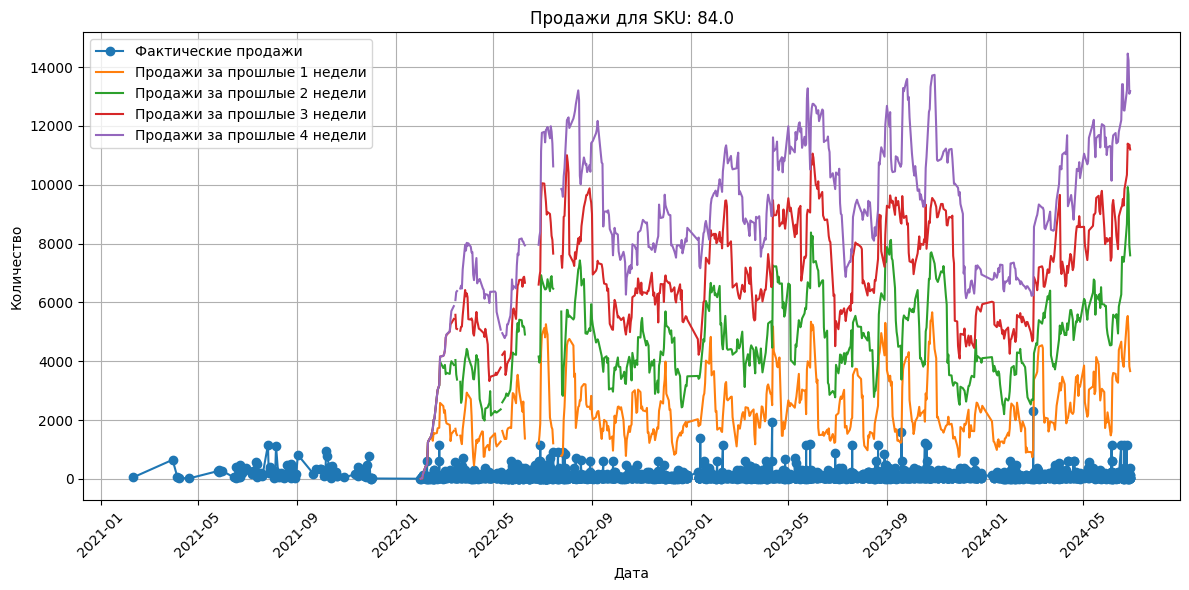

In [16]:
import matplotlib.pyplot as plt

# Выбор случайного SKU для визуализации
random_sku = fulfilled_data['SKU'].sample(1).iloc[0]
sku_data = data[data['SKU'] == random_sku].sort_values('Дата счёта')

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(sku_data['Дата счёта'], sku_data['Количество (шт.)'], marker='o', label='Фактические продажи')
for weeks in range(1, 5):
    plt.plot(sku_data['Дата счёта'], sku_data[f'Продажи_за_прошлые_{weeks}_недели'], 
             label=f'Продажи за прошлые {weeks} недели')

plt.title(f'Продажи для SKU: {random_sku}')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 1. ОЧИСТКА И КОНСОЛИДАЦИЯ ДАННЫХ
def load_and_clean_data(file_path):
    """
    Загрузка и очистка данных из CSV файла
    """
    # Загрузка данных
    df = pd.read_csv(file_path, parse_dates=['Дата счёта'])
    
    # Переименование колонок для удобства
    column_mapping = {
        'Клиент': 'client_id',
        'Область': 'region',
        'SKU': 'sku',
        'Дата счёта': 'invoice_date',
        'Количество (шт.)': 'quantity',
        'Цена (р.)': 'price',
        'Сумма_заказа': 'final_price',
        'Группа': 'group',
        'Тип': 'type',
        'Категория': 'category'
    }
    
    # Применяем переименование для существующих колонок
    df.rename(columns={k: v for k, v in column_mapping.items() if k in df.columns}, inplace=True)
    
    # Обработка числовых колонок
    numeric_columns = ['quantity', 'price', 'final_price']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Заполнение пропущенных значений
    df.fillna({
        'quantity': 0,
        'price': 0,
        'final_price': 0
    }, inplace=True)
    
    
    # Добавление временных компонентов для анализа
    if 'invoice_date' in df.columns:
        df['year'] = df['invoice_date'].dt.year
        df['month'] = df['invoice_date'].dt.month
        df['quarter'] = df['invoice_date'].dt.quarter
        df['date_key'] = df['invoice_date'].dt.to_period('M').dt.start_time
    
    return df
    
def filter_and_deduplicate_canceled_orders(data, time_window='D'):
    """
    Фильтрует отмененные заказы и удаляет дубликаты в рамках заданного временного окна
    
    Параметры:
    data (DataFrame): Датафрейм с данными о заказах
    time_window (str): Временное окно для группировки ('D' для дня)
    
    Возвращает:
    DataFrame: Датафрейм с уникальными отмененными заказами
    """
    # Копируем данные, чтобы избежать изменения исходного датафрейма
    df = data.copy()
    
    # Фильтруем отмененные заказы, если есть соответствующая колонка
    if 'order_status' in df.columns:
        df = df[df['order_status'] == 'canceled']
    
    # Убедимся, что дата в правильном формате
    date_column = 'Дата счёта' if 'Дата счёта' in df.columns else 'invoice_date'
    
    if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
        df[date_column] = pd.to_datetime(df[date_column])
    
    # Создаем временное окно для группировки
    df['time_window'] = df[date_column].dt.floor(time_window)
    
    # Определяем ключевые колонки для поиска дубликатов
    client_col = 'Клиент' if 'Клиент' in df.columns else 'client_id'
    sku_col = 'SKU' if 'SKU' in df.columns else 'sku'
    quantity_col = 'Количество' if 'Количество' in df.columns else 'quantity'
    price_col = 'Цена (р.)' if 'Цена (р.)' in df.columns else 'price'
    
    # Удаляем дубликаты, оставляя только одно значение для каждой комбинации
    deduplicated = df.drop_duplicates(
        subset=[client_col, sku_col, quantity_col, price_col, 'time_window']
    )
    
    # Удаляем временную колонку
    deduplicated = deduplicated.drop(columns=['time_window'])
    
    return deduplicated

def consolidate_orders(completed_orders_path, uncompleted_orders_path):
    """
    Консолидация выполненных и невыполненных заказов
    """
    # Загрузка и очистка данных
    completed = load_and_clean_data(completed_orders_path)
    uncompleted = load_and_clean_data(uncompleted_orders_path)
    uncompleted = filter_and_deduplicate_canceled_orders(uncompleted)
    # Добавление флага статуса заказа
    completed['order_status'] = 'completed'
    uncompleted['order_status'] = 'uncompleted'
    
    # Консолидация данных
    consolidated = pd.concat([completed, uncompleted], sort=False)
    consolidated.fillna(0)
    consolidated = consolidated.replace('UNK', 'Unk')
    consolidated[consolidated['order_status']=='uncompleted']['final_price'] = 0
    return consolidated

In [21]:

# ПРИМЕР ИСПОЛЬЗОВАНИЯ КОДА
def main():
    """
    Пример использования функций для анализа данных KUDO
    """
    try:
        # 1. Загрузка и консолидация данных
        print("1. Загрузка и консолидация данных...")
        consolidated_data = consolidate_orders('/kaggle/input/final-dataset-conc/final_df_latest2.csv', '/kaggle/input/concated-data/denied.csv')
        print(f"Загружено записей: {len(consolidated_data)}")
        print(consolidated_data.columns)
        
    except Exception as e:
        print(f"Ошибка при выполнении анализа: {e}")

if __name__ == "__main__":
    main()


1. Загрузка и консолидация данных...
Ошибка при выполнении анализа: name 'consolidate_orders' is not defined
